# Analysis of the data

## Imports

In [1]:
import pandas as pd
from pathlib import Path
from typing import Dict, List
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn import preprocessing
from sklearn.metrics import log_loss

## Variables

In [2]:
TRAIN_VAL_DATA_PATH: Path = os.path.join('..','..', 'data', 'train_val.parquet')

## Utility Functions

In [4]:
def show_all(df: pd.DataFrame):
    """Display all rows and columns of a dataframe.

    Args:
    
        df (pd.Dataframe): The dataframe to display.
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

## Read data

In [5]:
df: pd.DataFrame = pd.read_parquet(TRAIN_VAL_DATA_PATH) 
df = df.astype({f"f_{i}": "category" for i in range(2, 33)})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3485852 entries, 0 to 115919
Data columns (total 82 columns):
 #   Column        Dtype   
---  ------        -----   
 0   f_0           UInt32  
 1   f_1           UInt8   
 2   f_2           category
 3   f_3           category
 4   f_4           category
 5   f_5           category
 6   f_6           category
 7   f_7           category
 8   f_8           category
 9   f_9           category
 10  f_10          category
 11  f_11          category
 12  f_12          category
 13  f_13          category
 14  f_14          category
 15  f_15          category
 16  f_16          category
 17  f_17          category
 18  f_18          category
 19  f_19          category
 20  f_20          category
 21  f_21          category
 22  f_22          category
 23  f_23          category
 24  f_24          category
 25  f_25          category
 26  f_26          category
 27  f_27          category
 28  f_28          category
 29  f_29          c

In [6]:
numerical_columns: List[str] = [f"f_{i}" for i in range(42, 80)]
binary_columns: List[str] = [f"f_{i}" for i in range(33, 42)]

## Analysis of null values

In [8]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
show_all(counts)

Number of null values per column:


,count,nulls
f_0,3485852,0
f_1,3485852,0
f_2,3485852,0
f_3,3485852,0
f_4,3485852,0
f_5,3485852,0
f_6,3485852,0
f_7,3485852,0
f_8,3485852,0
f_9,3485852,0


In [9]:
show_all(df.head())

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
0,2541162,51,29,4,123,4,2334,0,0,6,2,22,10,170,10,3586,5,43,164,10,33,0,0,0,0,0,0,0,0,0,2,2,3,True,True,True,True,True,True,False,False,False,678.001221,1.400127,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.510695,1.000002,0.000000,16.000029,21.000038,2.000004,66.000114,0.803333,3.397252,0.0,0.000000,12.999970,8.000002,69350016.0,1462.240112,1.599715,7.851264,0.000000,0.000000,2.828680,2.0,7.0,3.0,3.000005,30.000053,7.000012,0.0,0.0,0.0,False,False
1,2541260,49,87,0,451,0,3625,0,4,0,0,3,23,32,7,2422,10,5,320,12,3,3,0,0,0,0,0,0,0,0,2,2,3,False,False,False,True,True,True,False,False,False,207.000366,0.001049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.726135,0.000000,0.000000,0.000000,8.000014,0.000000,10.000017,1.518634,3.205653,0.0,0.000000,0.000000,0.000000,126347712.0,1639.124390,0.000873,8.157428,1.089364,1.646756,0.000000,0.0,0.0,0.0,3.000005,30.000053,7.000012,0.0,0.0,0.0,False,False
2,2541318,51,87,0,451,4,3625,0,4,6,2,1,15,184,10,5812,10,45,598,12,3,3,0,0,0,0,0,0,0,0,2,2,3,False,False,False,True,True,True,False,False,False,150.000259,0.000187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.668478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.511121,2.413887,0.0,1.999999,2.999993,0.000000,192447264.0,1808.083740,0.000156,8.269833,1.106260,2.220819,0.000000,0.0,0.0,0.0,1.000002,30.000053,7.000012,0.0,0.0,0.0,False,False
3,2541770,64,57,4,148,4,4793,0,4,4,0,8,6,232,7,1314,6,20,320,17,5,0,0,0,0,0,0,0,0,0,0,0,2,False,True,True,True,True,True,False,False,False,751.001282,2.487278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092316,1.000002,1.000002,3.000005,1.000002,1.000002,1.000002,1.336304,1.302389,0.0,1.999999,0.000000,14.000004,17889246.0,110.105034,2.276684,9.171566,0.000000,0.000000,1.598379,0.0,3.0,2.0,3.000005,30.000053,7.000012,0.0,0.0,0.0,False,False
4,2542002,62,87,0,614,0,100,0,0,5,2,1,23,232,13,2177,10,5,164,12,3,3,0,0,0,0,0,0,0,0,0,0,3,False,False,False,True,True,True,False,False,False,190.000336,0.000740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.621443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.620839,2.184986,0.0,0.000000,0.000000,1.000000,177032128.0,1478.281372,0.000615,8.126352,0.200315,0.444261,0.000000,0.0,0.0,0.0,3.000005,30.000053,7.000012,0.0,0.0,0.0,False,False


In [10]:
show_all(df.describe())

,f_0,f_1,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79
count,3485852.0,3485852.0,3.485852e+06,3.304425e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.304425e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.304425e+06,3.304425e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.304425e+06,3.304425e+06,3.304425e+06,3.304425e+06,3.304425e+06,3.304425e+06,3.304425e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06,3.485852e+06
mean,1742926.5,54.847424,4.892908e+02,1.089989e+00,1.303469e-02,1.662434e-02,5.765305e-03,2.225740e-02,3.792990e-02,2.094036e-02,5.912414e-02,9.612607e+00,1.675814e+00,7.584403e-01,2.891022e+00,9.008270e+00,4.129601e+00,1.605297e+01,1.497334e+00,7.198649e+01,1.100867e-01,7.663808e+00,9.134980e+00,3.330464e+00,1.606620e+09,1.456593e+03,1.070658e+00,8.039029e+00,3.488874e+00,5.381361e+00,1.046329e+00,7.485802e-02,1.494040e+00,4.325935e-01,1.685286e+00,2.597175e+01,5.824133e+00,1.837714e-03,2.856231e-02,9.537123e-03
std,1006278.939615,6.334539,1.120353e+03,9.193922e-01,1.510397e-01,1.735617e-01,9.174222e-02,2.120535e-01,2.425291e-01,1.720142e-01,3.170375e-01,8.614144e+00,4.457142e+00,2.421884e+00,6.690818e+00,1.565035e+01,8.085135e+00,2.431342e+01,6.851057e-01,4.259454e+02,5.356644e+00,2.501332e+01,4.447666e+01,1.139173e+01,2.285624e+10,3.333623e+03,8.796629e-01,9.771121e-01,1.019813e+01,9.375842e+00,1.103294e+00,3.199843e-01,2.253150e+00,9.732041e-01,1.421945e+00,9.248959e+00,2.455000e+00,4.351360e-02,1.838606e-01,1.014291e-01
min,1.0,45.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.166491e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,871463.75,49.0,7.600013e+01,7.527682e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.447737e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000002e+00,1.105297e+00,5.290664e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.828068e+07,2.672391e+02,6.456863e-04,7.878196e+00,0.000000e+00,0.000000e+00,1.559339e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000005e+01,7.000012e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1742926.5,55.0,2.680005e+02,1.167687e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.755807e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000005e+00,1.000002e+00,7.000012e+00,1.516973e+00,2.112213e+00,0.000000e+00,9.999993e-01,0.000000e+00,0.000000e+00,5.643671e+07,1.185379e+03,1.181896e+00,8.112683e+00,2.007878e-01,4.888043e-01,8.754039e-01,0.000000e+00,1.000000e+00,0.000000e+00,3.000005e+00,3.000005e+01,7.000012e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2614389.25,60.0,6.330011e+02,1.748550e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.521945e+01,1.000002e+00,0.000000e+00,3.000005e+00,1.100002e+01,5.000009e+00,2.100004e+01,1.734144e+00,2.904613e+00,0.000000e+00,7.999994e+00,2.999993e+00,3.000000e+00,9.176122e+07,1.865941e+03,1.731363e+00,8.260674e+00,1.106260e+00,2.436495e+00,1.455764e+00,0.000000e+00,2.000000e+00,1.000000e+00,3.000005e+00,3.000005e+01,7.000012e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3485852.0,66.0,6.089051e+05,1.176024e+02,2.300000e+01,2.500000e+01,1.000000e+01,8.300001e+01,2.700000e+01,2.100000e+01,5.000000e+01,3.072614e+01,2.430004e+02,1.310002e+02,4.470008e+02,1.846

In [11]:
print("Number of unique row ids:", df['f_0'].nunique())
print("Number of rows:", df.shape[0])

Number of unique row ids: 3485852
Number of rows: 3485852


### Analysis of dates

<Axes: xlabel='f_1'>

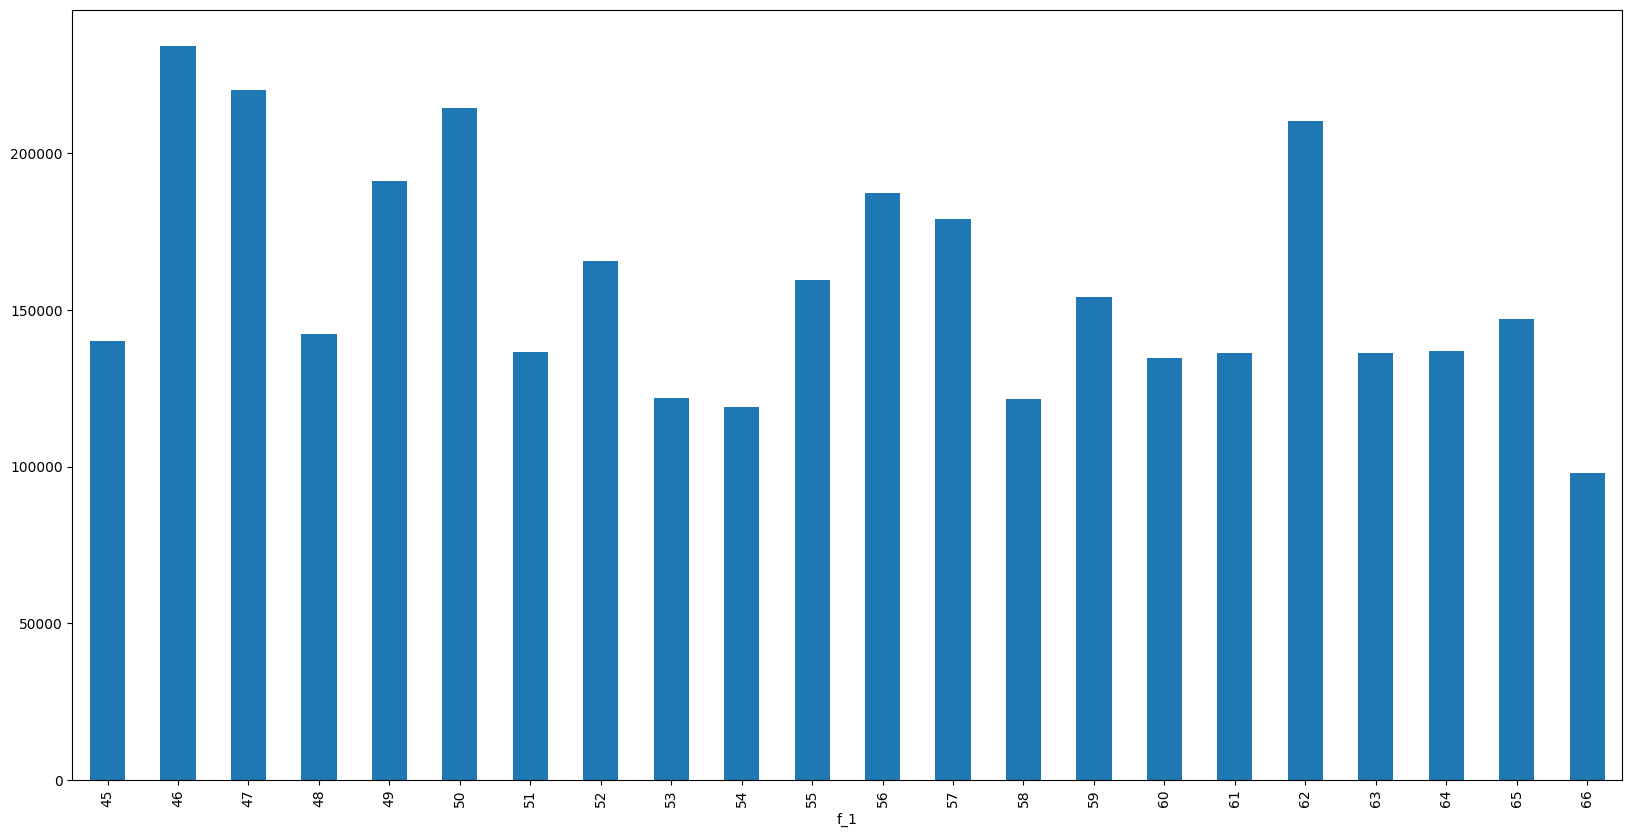

In [9]:
dates: pd.DataFrame = df['f_1']
dates.value_counts().sort_index().plot(kind='bar', figsize=(20, 10))

In [12]:
df.select_dtypes(include=['category'])

,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,...,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32
0,6581,22294,5491,25604,14597,27941,18800,31372,22970,32266,...,0,0,0,0,0,0,0,NaN,NaN,3
1,20095,563,22861,15908,22651,27941,21218,869,19343,12213,...,0,0,0,0,0,0,0,NaN,NaN,3
2,20095,563,22861,25604,22651,27941,21218,31372,22970,11407,...,0,0,0,0,0,0,0,NaN,NaN,3
3,13658,22294,7003,25604,29975,27941,21218,21533,19343,28360,...,0,0,0,0,0,0,0,0.0,0.0,2
4,20095,563,31686,15908,590,27941,18800,23218,22970,11407,...,0,0,0,0,0,0,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115915,12577,22294,2059,25604,18309,27941,21218,23218,19343,11407,...,0,0,0,0,0,0,0,NaN,NaN,3
115916,27426,22294,11338,21545,25991,27941,19203,6675,22970,27957,...,0,0,0,0,0,0,0,NaN,NaN,3
115917,26325,22294,9018,25604,943,27941,21218,869,19343,29848,...,0,0,0,0,0,0,0,0.0,0.0,3
115918,31824,22294,6036,19475,9209,27941,19203,23218,21574,31460,...,0,0,0,0,0,0,0,NaN,NaN,0


### Analysis of categorical features (f_2 to f_32)

In [6]:
categorical_columns: List[str] = [f"f_{i}" for i in range(2, 33)]

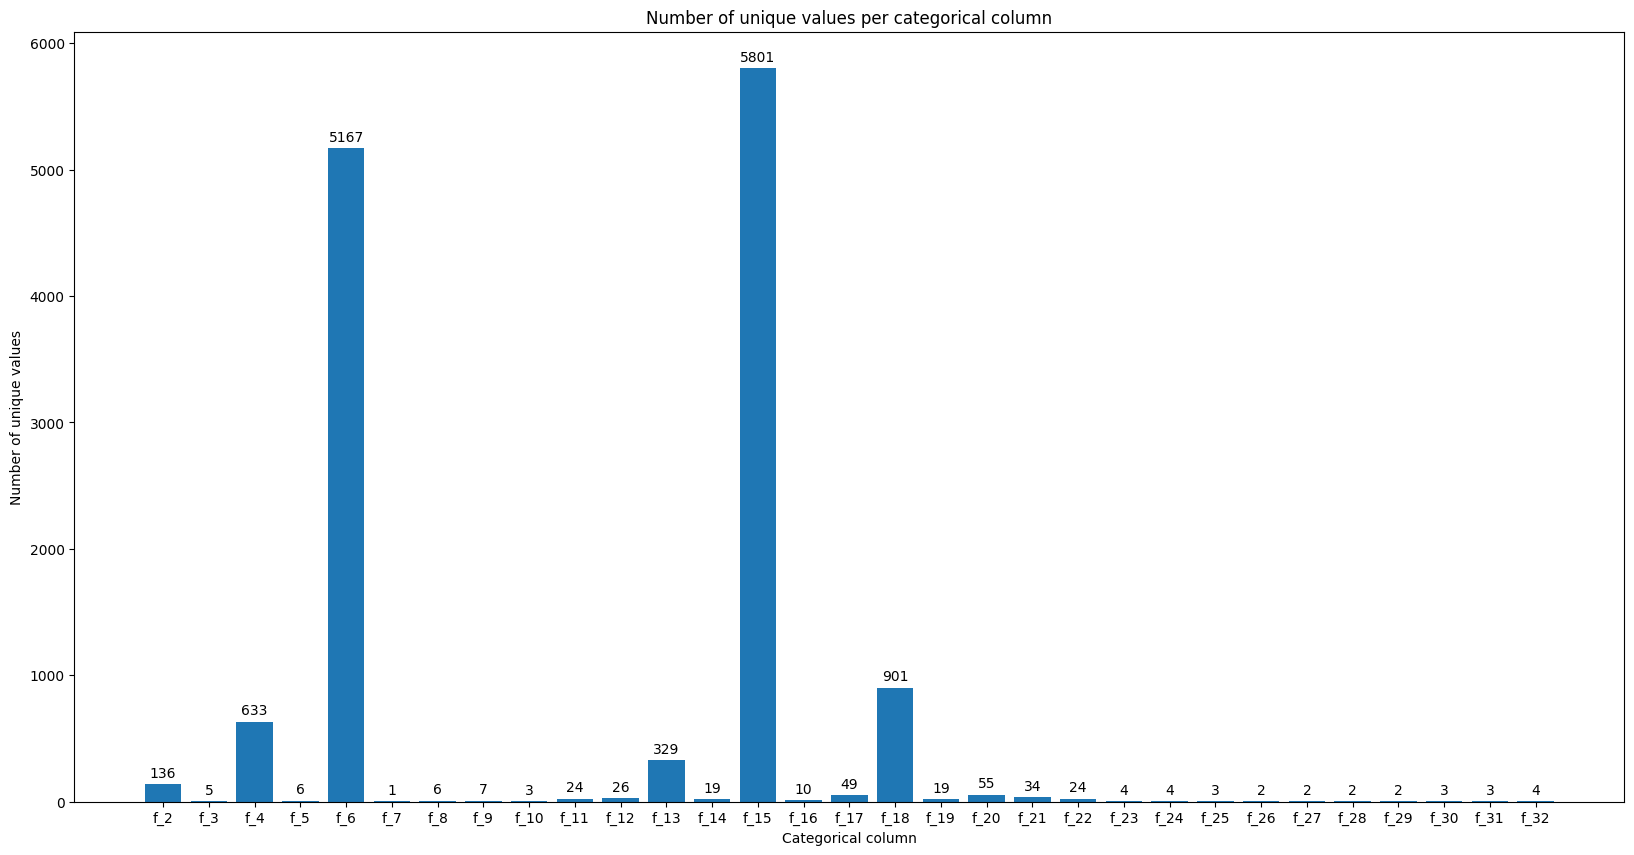

In [10]:
nunique_categorical_columns: pd.DataFrame = df[categorical_columns].nunique()
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(nunique_categorical_columns.index, nunique_categorical_columns.values)
ax.set_title('Number of unique values per categorical column')
ax.set_xlabel('Categorical column')
ax.set_ylabel('Number of unique values')
ax.bar_label(bars, padding=3)
plt.show()

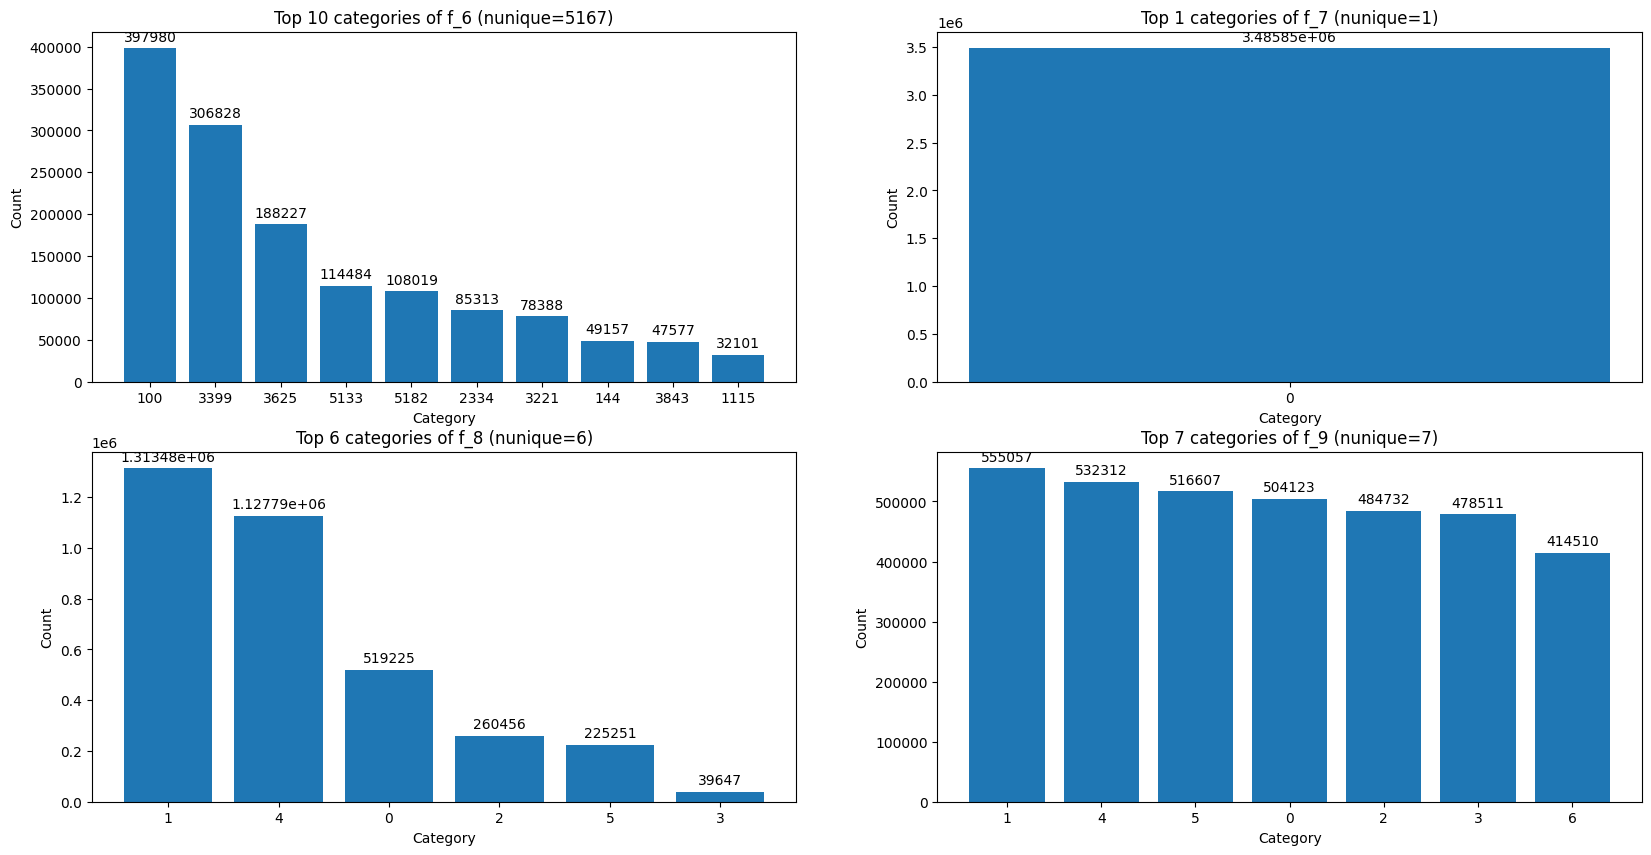

In [27]:
def plot_top_categories(df: pd.DataFrame, k: int, top_n: int = 15):
    """Plot the top categories of a categorical column.

    Args:
        df (pd.DataFrame): The dataframe to plot.
        k (int): Four columns are plotted from this index. For example, if k = 0, the first four columns are plotted.
        top_n (int, optional): The number of top categories to plot. Defaults to 15.
    """
    nunique: pd.DataFrame = df.nunique()
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    for i, column_index in enumerate(range(k, k + 4)):
        column = df.columns[column_index]
        top_categories = df[column].value_counts()[:top_n]
        ax: plt.Axes = axs[i // 2, i % 2]
        ax.bar([str(i) for i in top_categories.index], top_categories.values)
        ax.set_title(f'Top {min(top_n, nunique[column])} categories of {column} (nunique={nunique[column]})')
        ax.set_xlabel('Category')
        ax.set_ylabel('Count')
        ax.bar_label(axs[i // 2, i % 2].containers[0], padding=3)
    plt.show()

plot_top_categories(df[categorical_columns], k=4, top_n=10)

In [17]:
threshold_day = 63

X_train = df[df["f_1"]<threshold_day].drop(columns=['is_clicked','is_installed'])
Y_train = df[df["f_1"]<threshold_day]
Y_train = Y_train[['is_installed']]

X_val = df[df["f_1"]>=threshold_day].drop(columns=['is_clicked','is_installed'])
Y_val = df[df["f_1"]>=threshold_day]
Y_val = Y_val[['is_installed']]

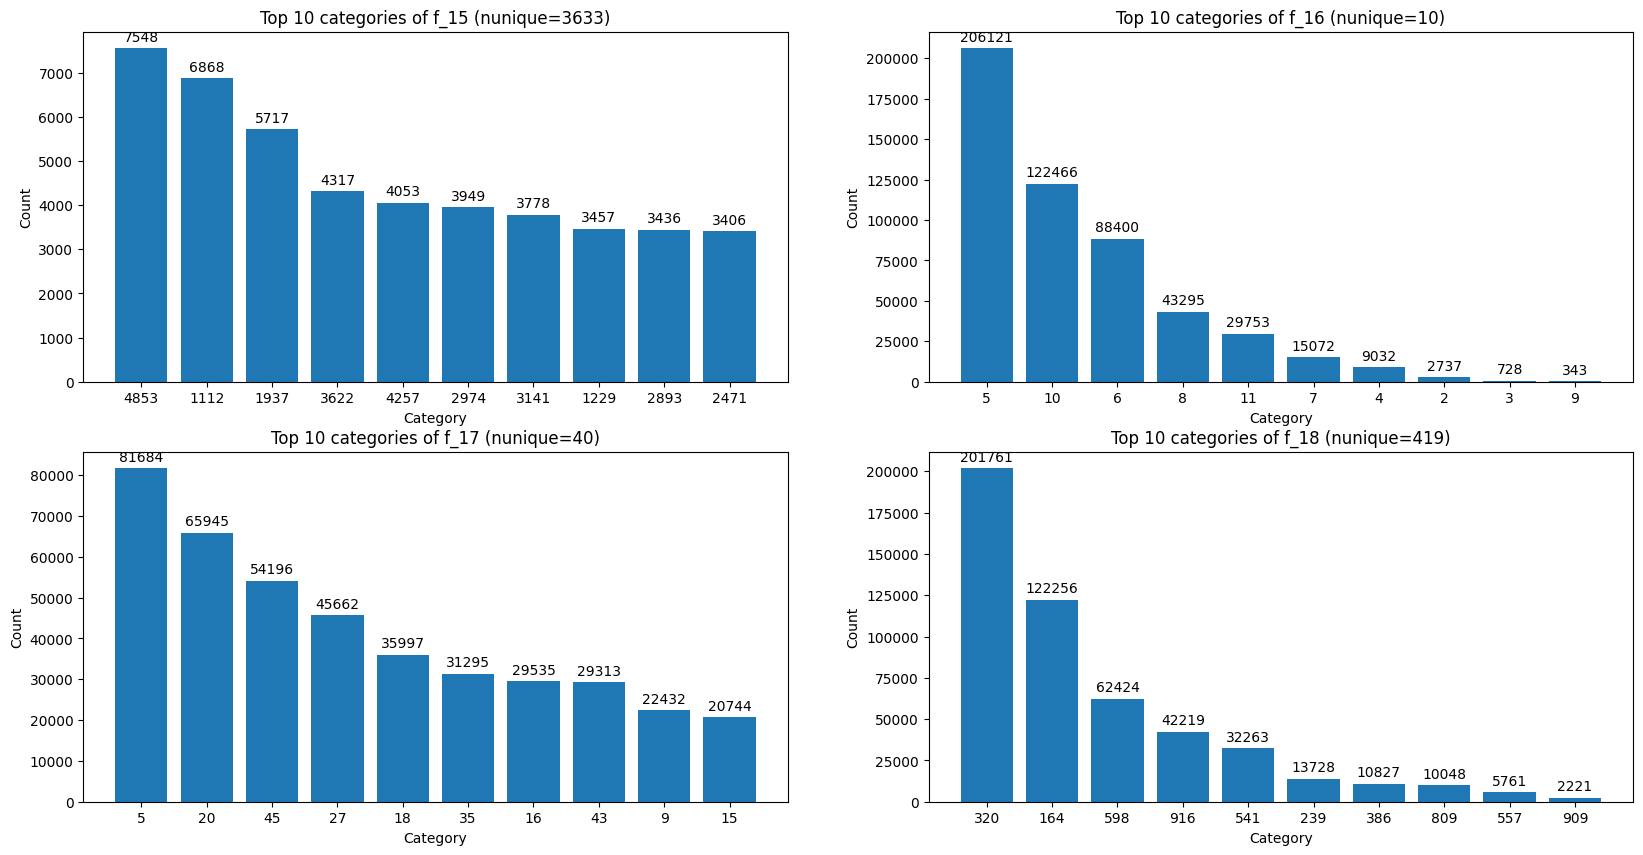

In [19]:
plot_top_categories(X_val[categorical_columns], k=13, top_n=10)

### Analysis of binary features (f_33 to f_41)

In [32]:
binary_columns: List[str] = [f"f_{i}" for i in range(33, 42)]

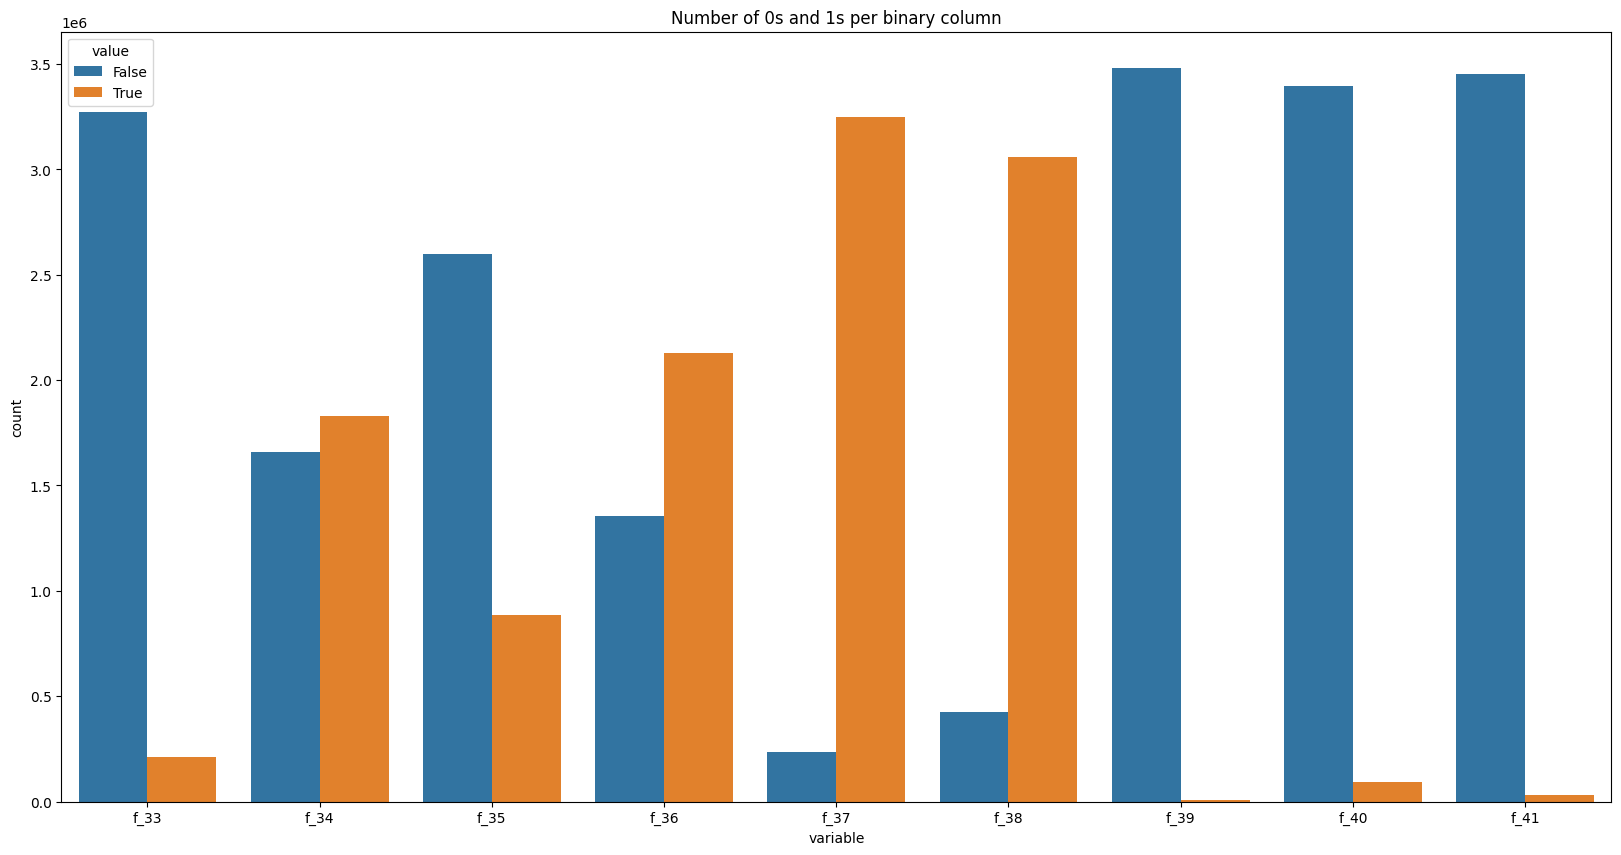

In [33]:
# This is a bit slow, just wait for it to finish
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x="variable", hue="value", data=pd.melt(df[binary_columns]))
ax.set_title('Number of 0s and 1s per binary column')
plt.show()

### Analysis of numerical features (f_42 to f_79)

In [11]:
numerical_columns: List[str] = [f"f_{i}" for i in range(42, 80)]

In [12]:
df_sorted=df.sort_values(by=['f_1'])
df_sorted

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
55882,2522321,45,3346,22294,6767,21545,1159,27941,19203,6675,...,0.000000,0.000000,0.000000,0.539897,0.000000,0.0,0.0,0.0,False,False
23896,2377898,45,20095,563,31686,15908,590,27941,19203,6675,...,0.571121,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,False,False
10971,3173460,45,5156,22294,18971,25604,30192,27941,19203,6675,...,2.855607,0.571121,0.115692,1.156922,0.269948,0.0,0.0,0.0,False,False
85282,1930117,45,3346,22294,6767,21545,10208,27941,21621,6675,...,0.000000,0.000000,0.000000,0.192820,0.192820,0.0,0.0,0.0,False,False
66600,2318339,45,3346,22294,5579,15908,11774,27941,21218,6675,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,3012038,66,26325,7152,21563,21545,28565,27941,21621,6675,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,False,False
1188,3012328,66,20095,563,31686,19475,590,27941,19203,6675,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,False,False
46555,862173,66,20095,563,22861,25604,21280,27941,21218,6675,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,False,False
19126,2888400,66,26325,22294,4896,21545,26484,27941,19203,6675,...,3.426729,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,False,False


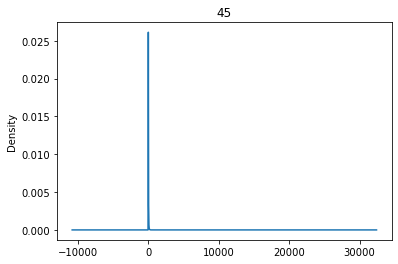

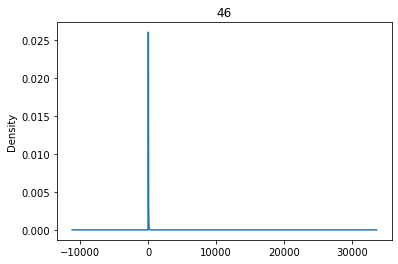

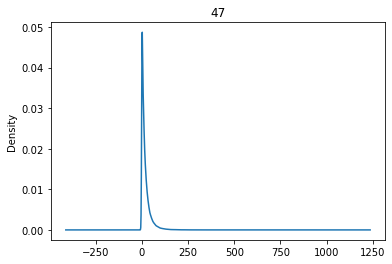

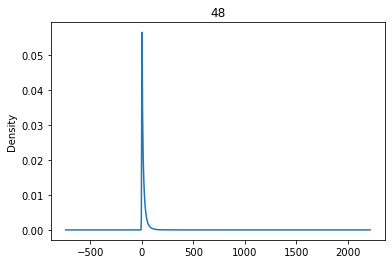

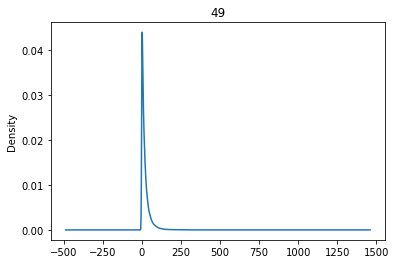

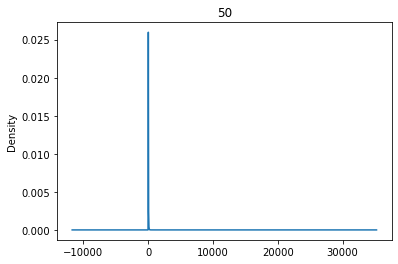

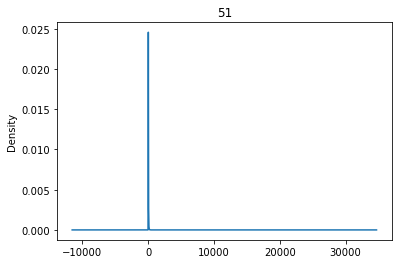

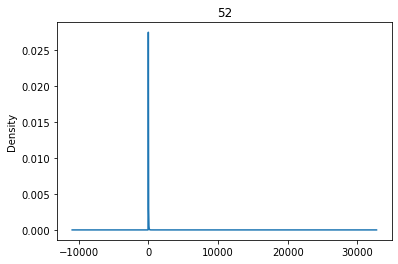

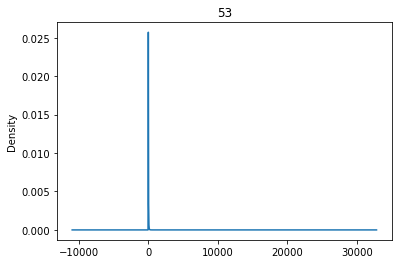

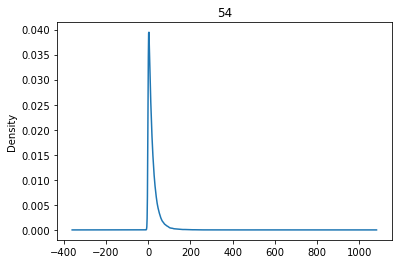

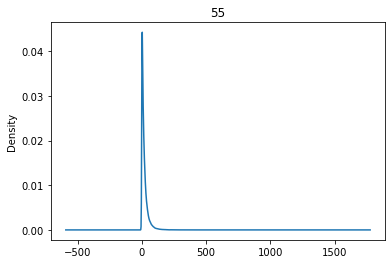

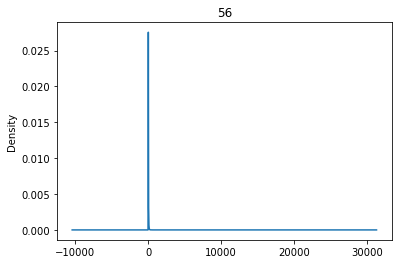

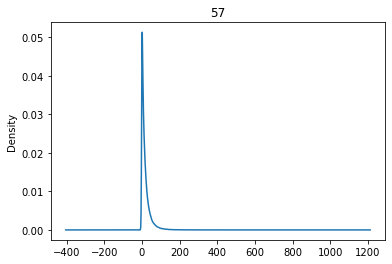

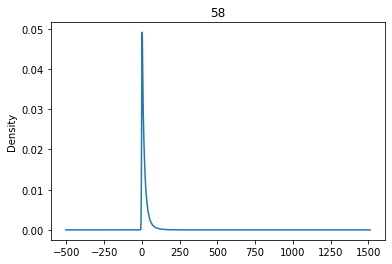

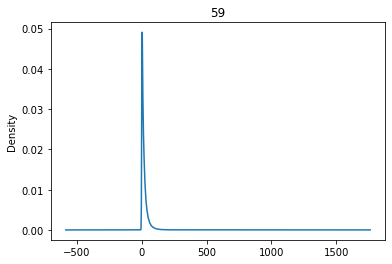

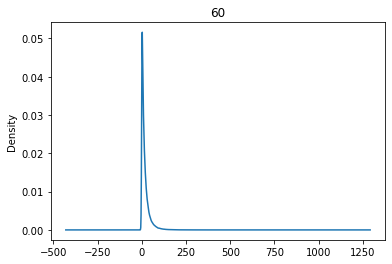

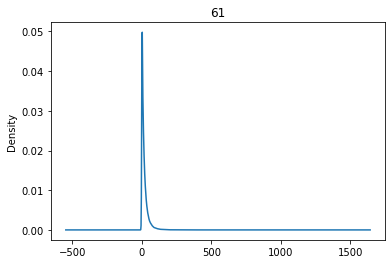

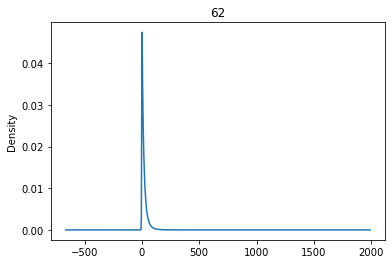

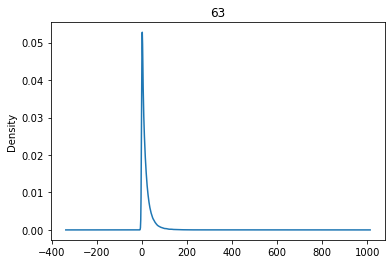

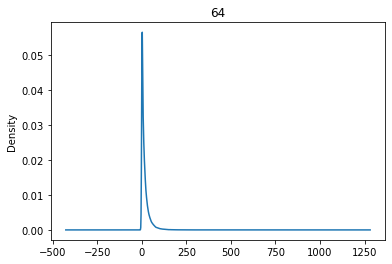

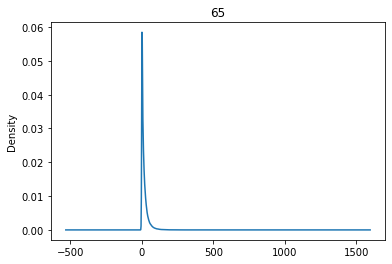

In [22]:
FEATURE='f_42'
DAY=45
for i in range(21):
    df_mod=df[df['f_1']==DAY]
    df_mod[FEATURE].plot(title=DAY, kind='kde')
    plt.show()
    DAY+=1

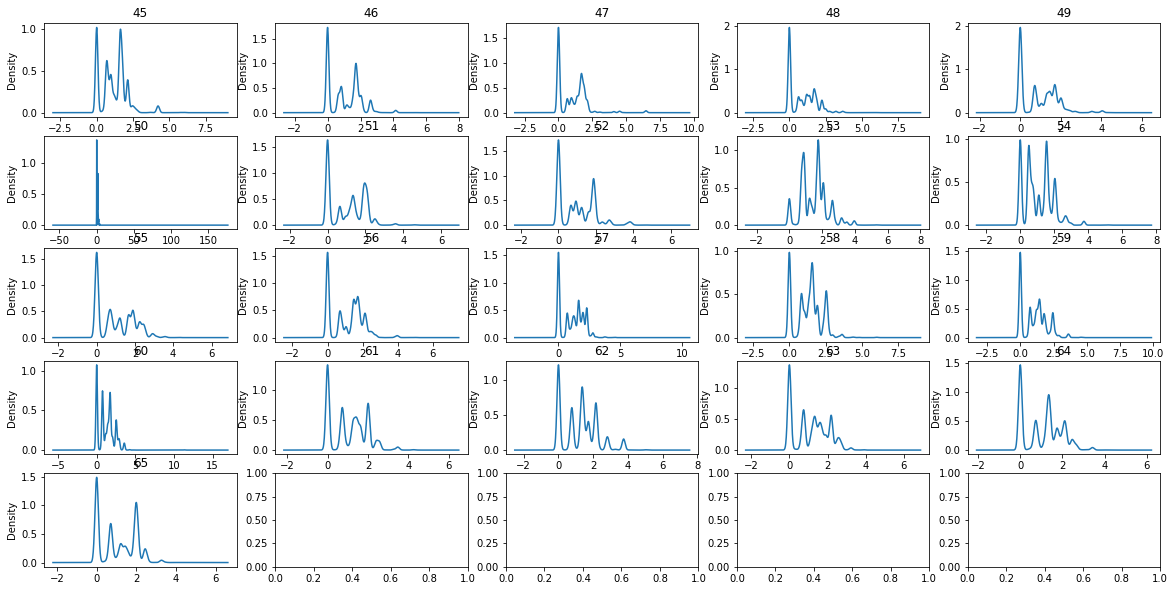

In [39]:
FEATURE='f_43'
DAY=45
fig, axs = plt.subplots(5,5, figsize=(20,10))
for i in range(21):
    df_mod=df[df['f_1']==DAY]
    ax: plt.Axes = axs[i // 5, i % 5]
    df_mod[FEATURE].plot(title=DAY, ax=ax, kind='kde')
    DAY+=1

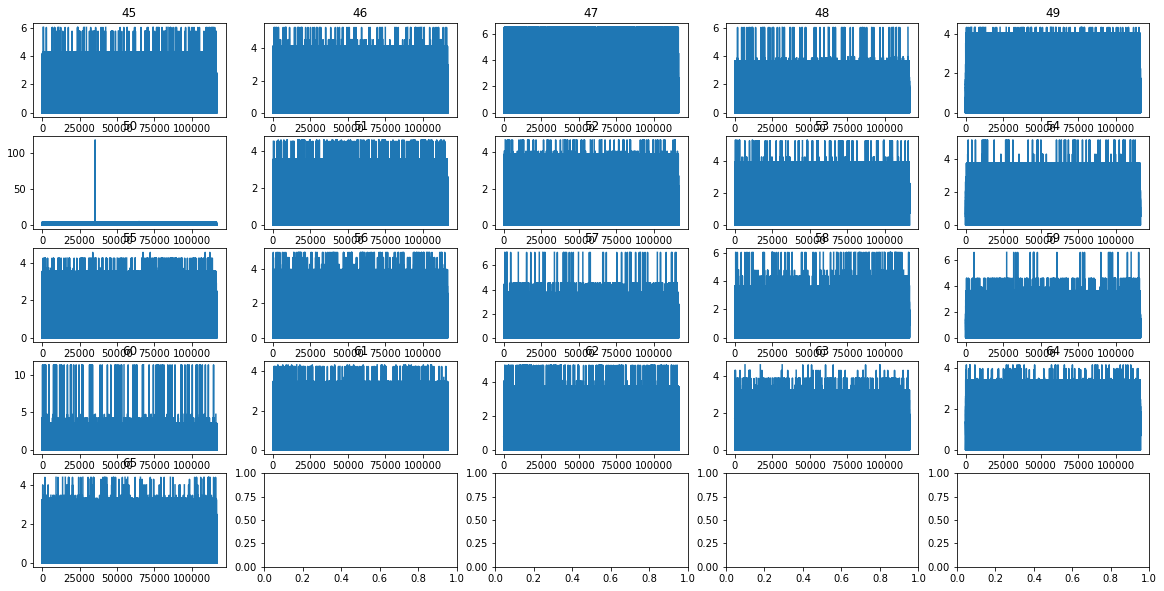

In [ ]:
FEATURE='f_43'
DAY=45
fig, axs = plt.subplots(5,5, figsize=(20,10))
for i in range(21):
    df_mod=df[df['f_1']==DAY]
    ax: plt.Axes = axs[i // 5, i % 5]
    df_mod[FEATURE].plot(title=DAY, ax=ax)
    DAY+=1

In [12]:
def plot_density(FEATURE):
    DAY=45
    fig, axs = plt.subplots(5,5, figsize=(20,10))
    for i in range(21):
        df_mod=df[df['f_1']==DAY]
        df_mod=df_mod[df_mod[FEATURE]!=0]
        ax: plt.Axes = axs[i // 5, i % 5]
        df_mod[FEATURE].plot(title=DAY, ax=ax, kind='kde')
        DAY+=1
    plt.show()

In [9]:
def plot_values(FEATURE):
    DAY=45
    fig, axs = plt.subplots(5,5, figsize=(20,10))
    for i in range(21):
        df_mod=df[df['f_1']==DAY]
        ax: plt.Axes = axs[i // 5, i % 5]
        df_mod[FEATURE].plot(title=DAY, ax=ax)
        DAY+=1
    plt.show()

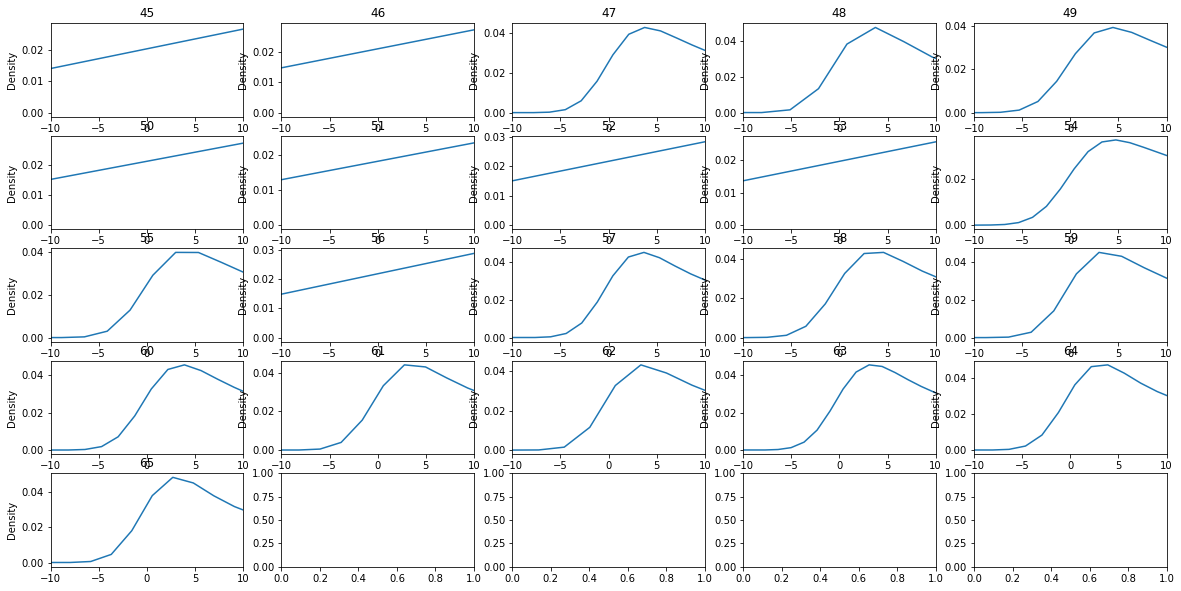

In [24]:
plot_density('f_42')


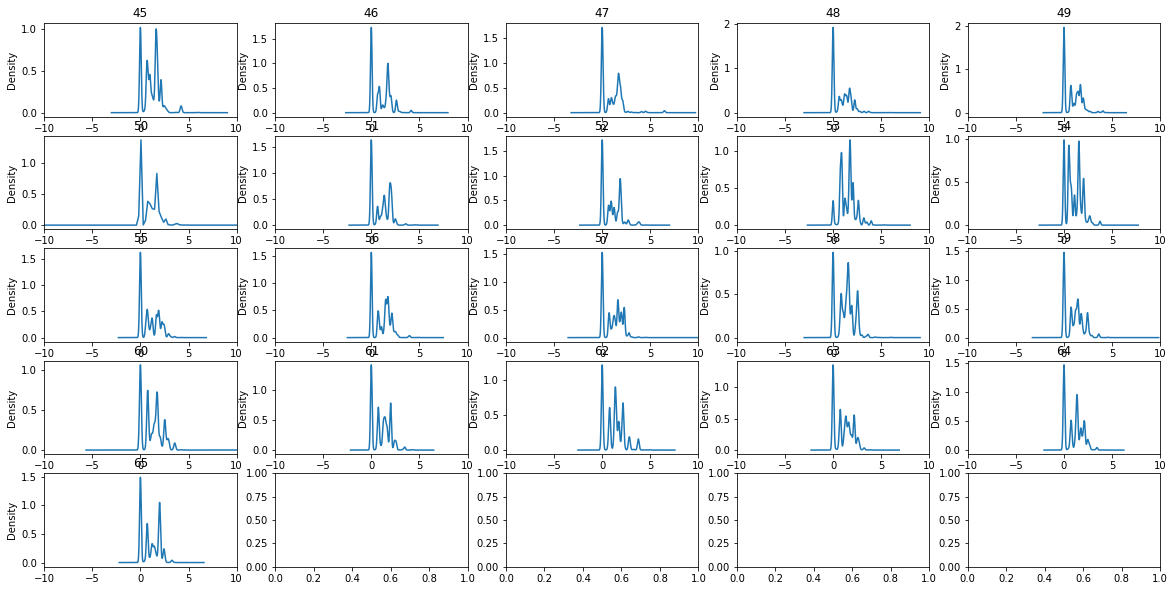

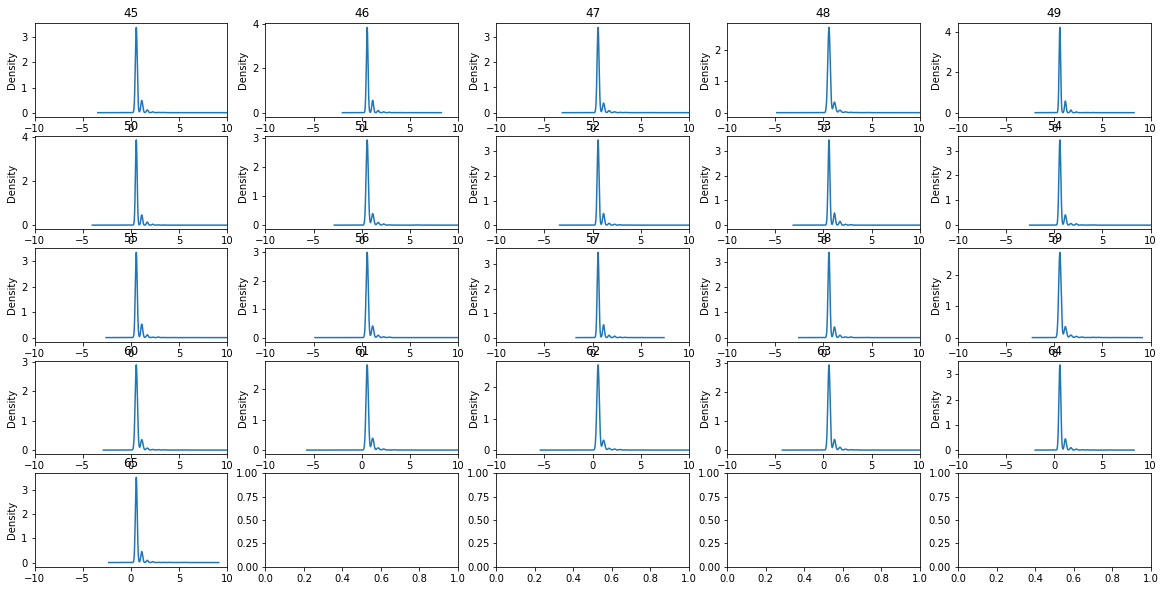

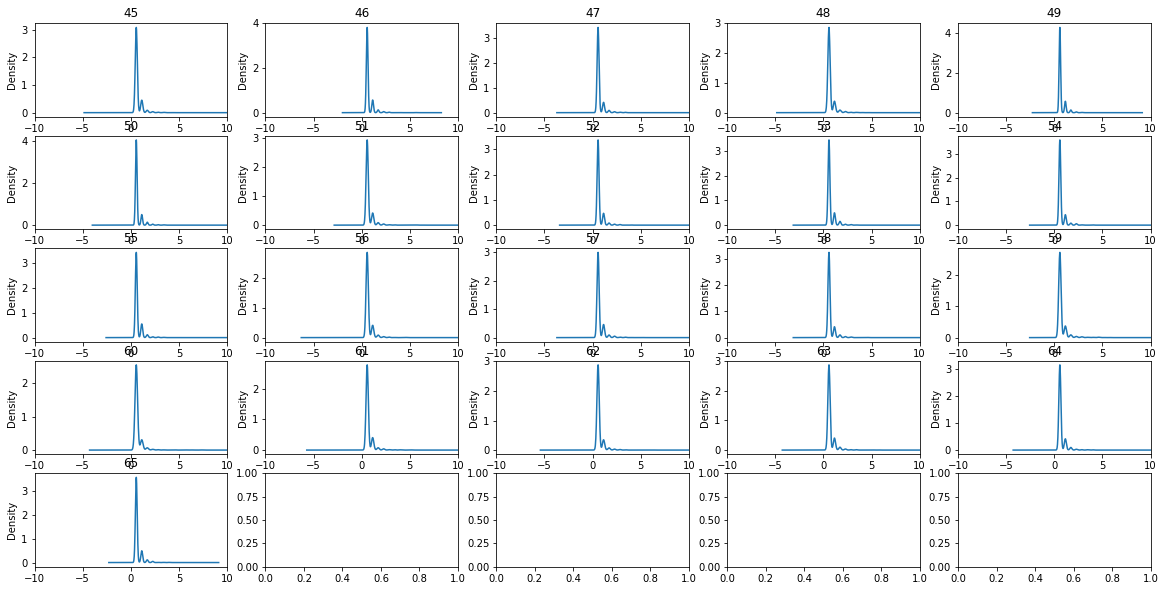

In [25]:
plot_density('f_43')
plot_density('f_44')
plot_density('f_45')

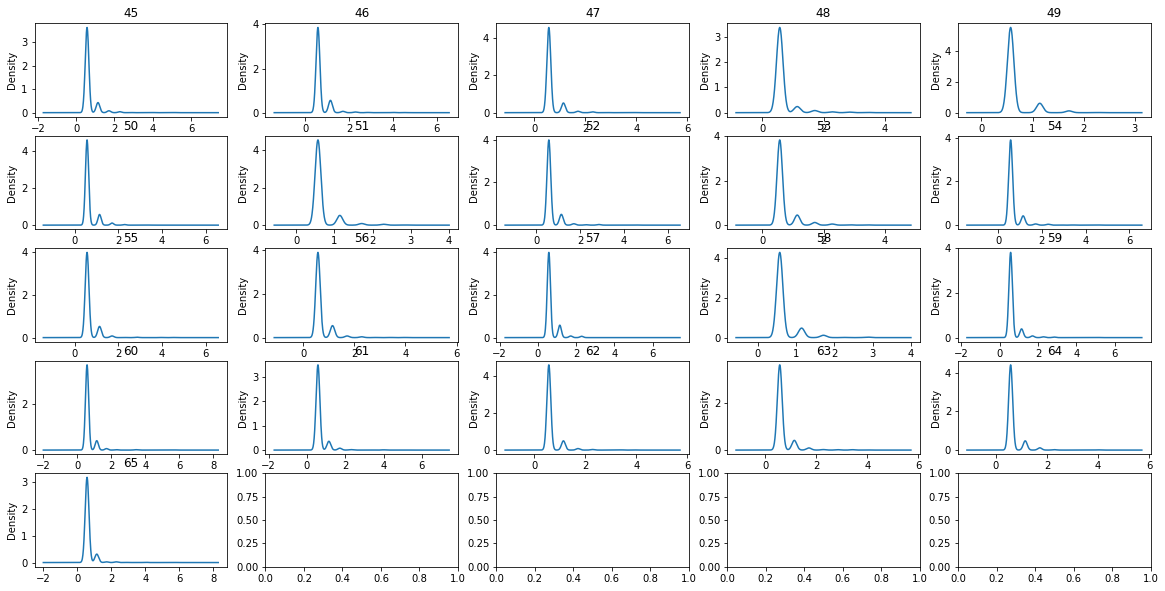

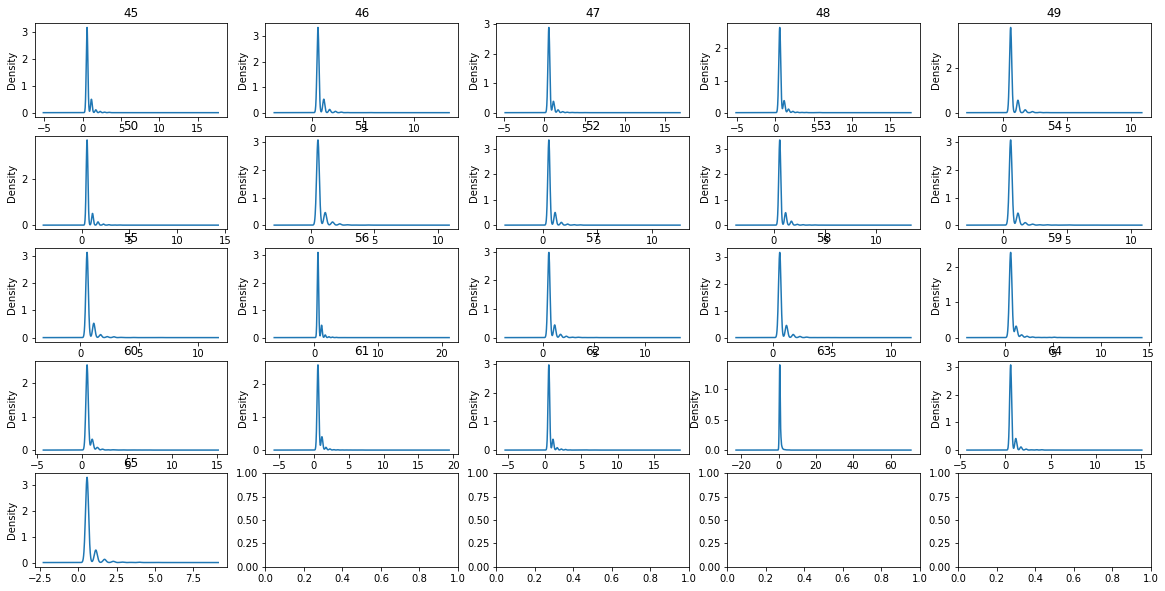

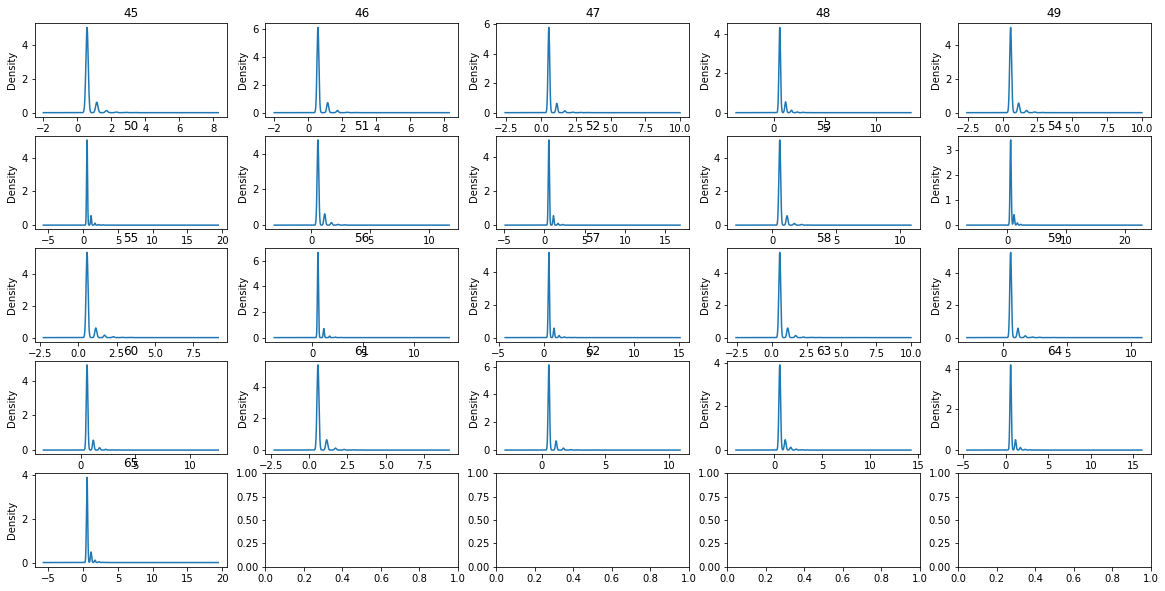

In [37]:
plot_density('f_46')
plot_density('f_47')
plot_density('f_48')

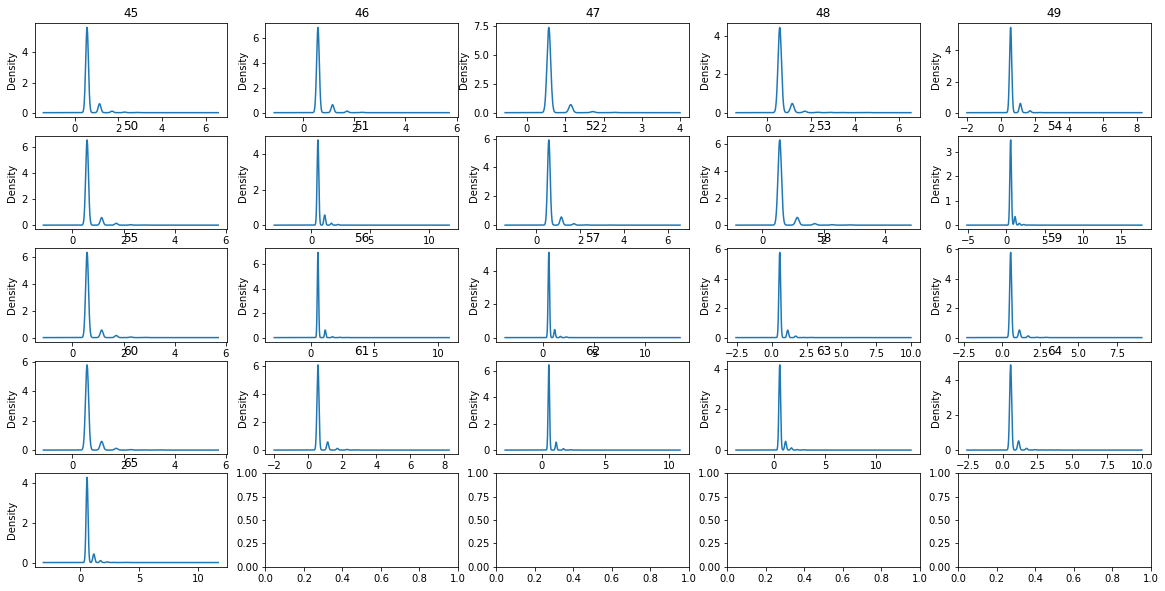

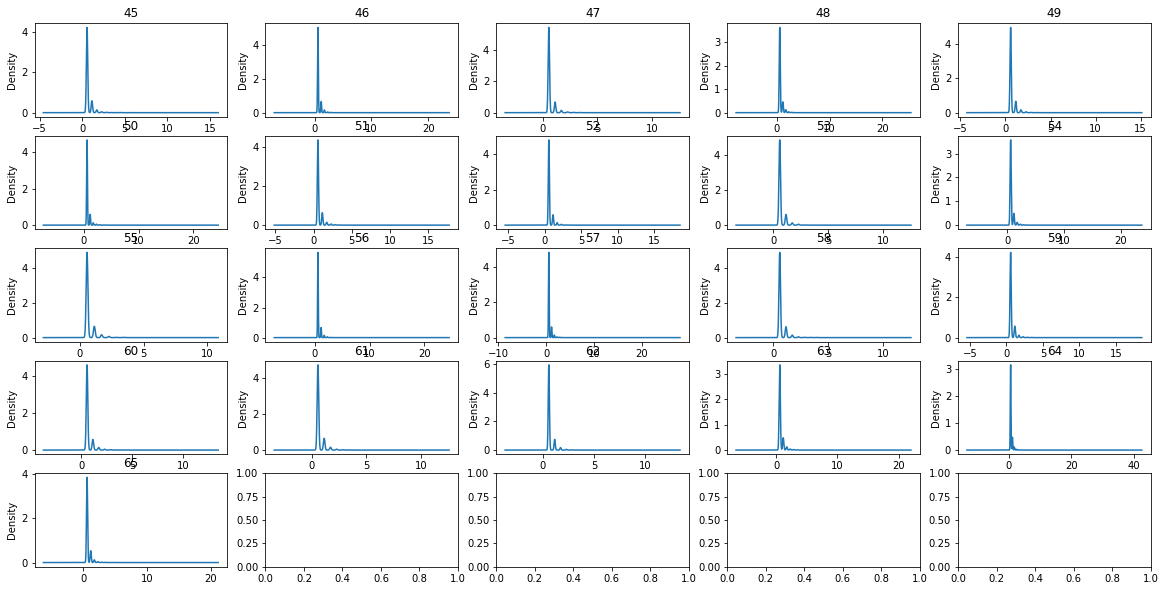

In [57]:
plot_density('f_49')
plot_density('f_50')

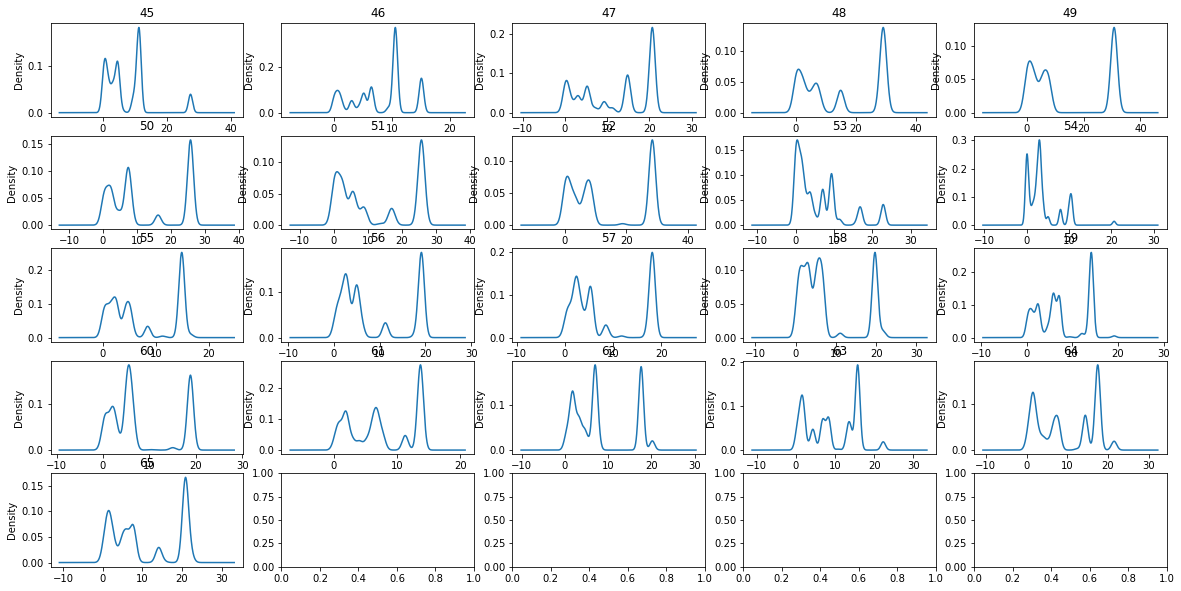

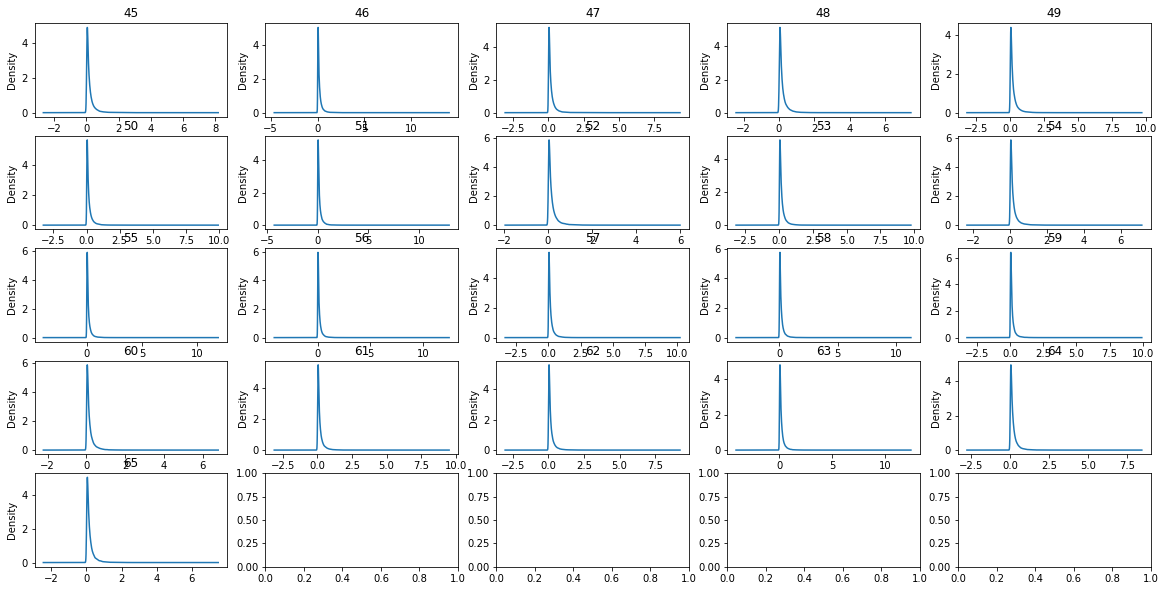

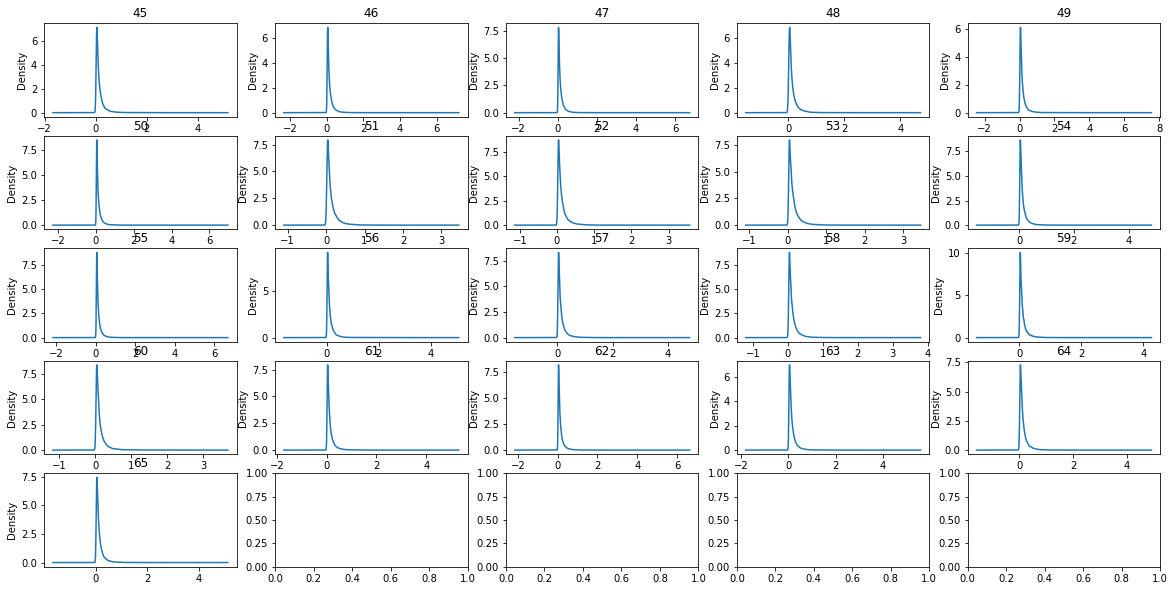

In [55]:
plot_density('f_51')
plot_density('f_52')
plot_density('f_53')

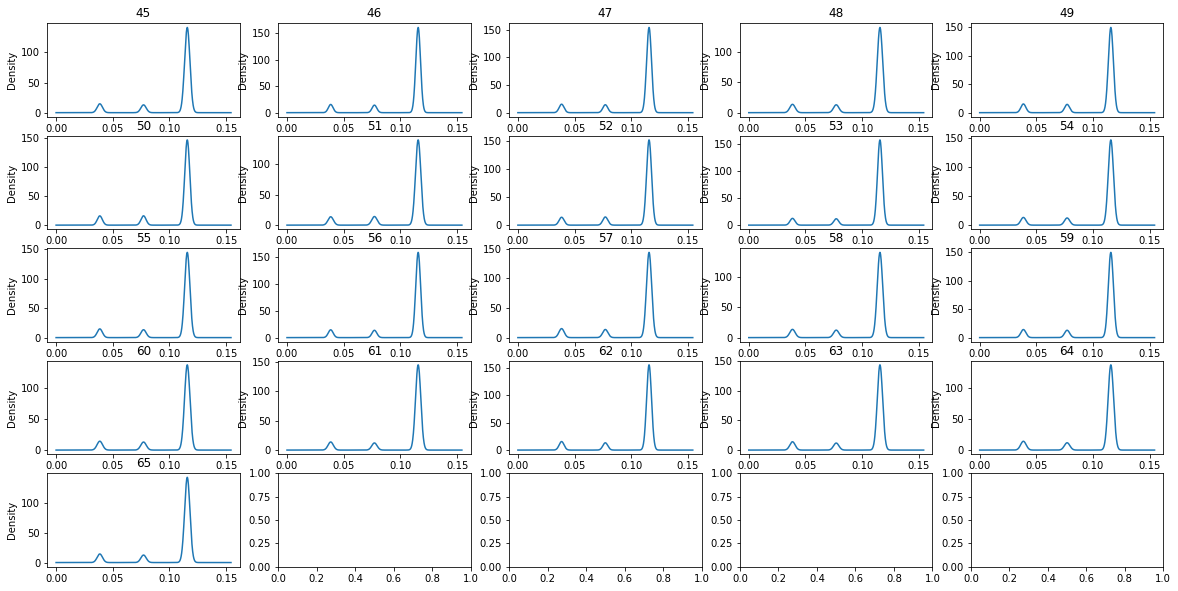

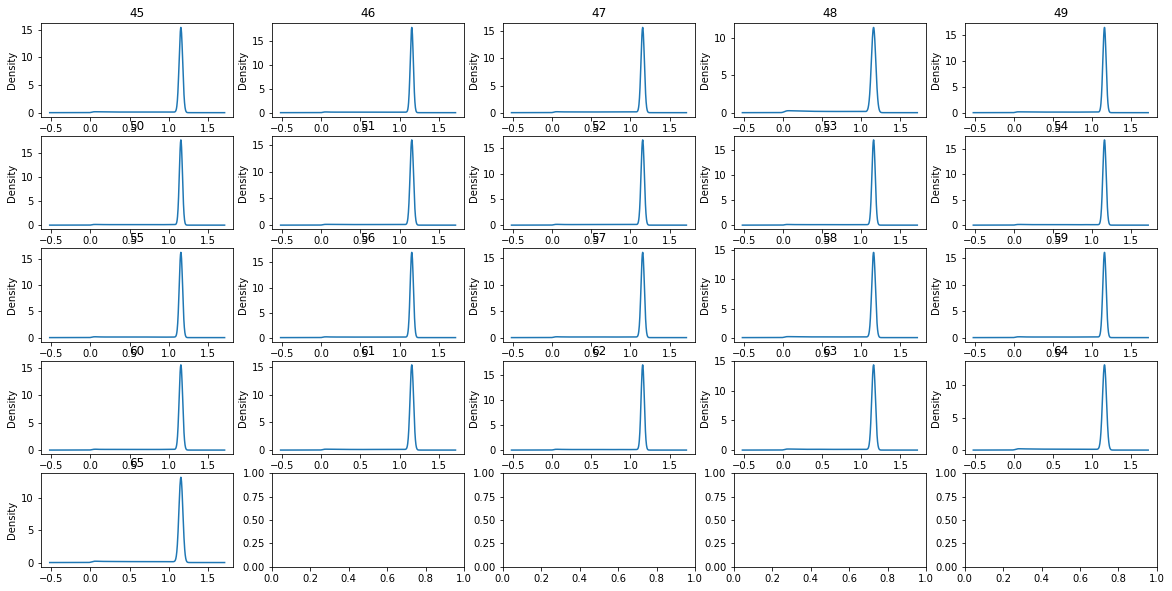

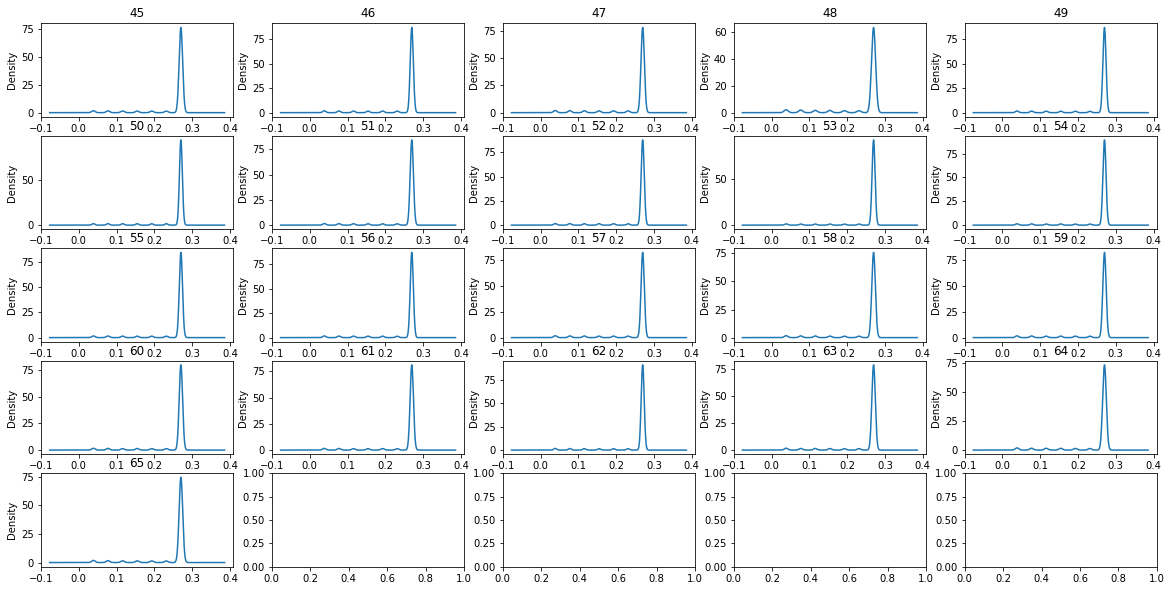

In [58]:
plot_density('f_74')
plot_density('f_75')
plot_density('f_76')

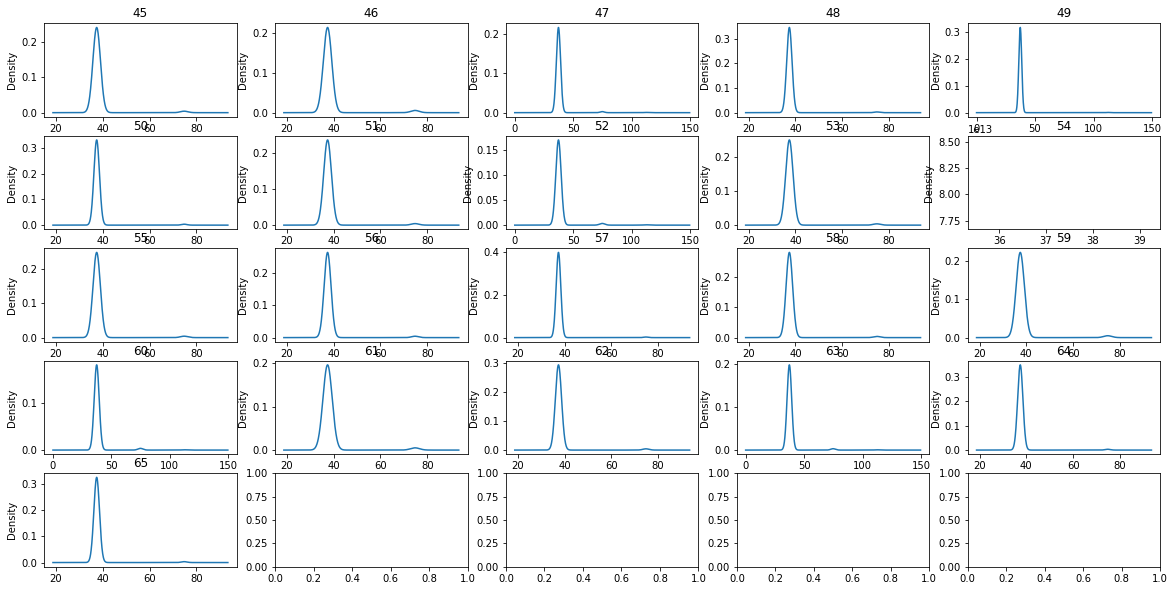

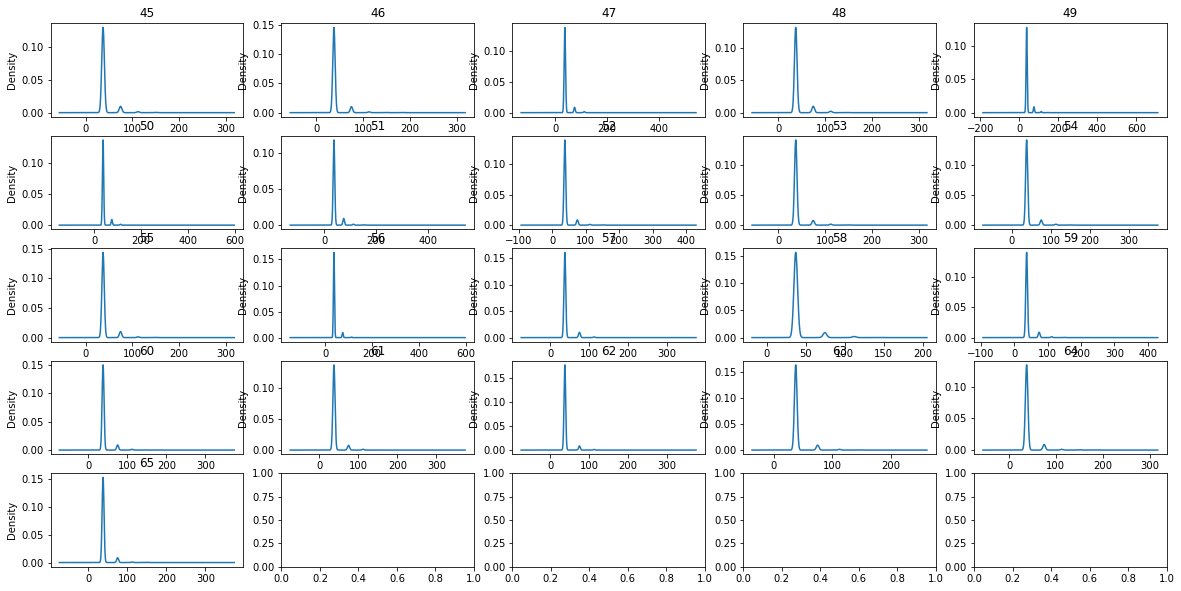

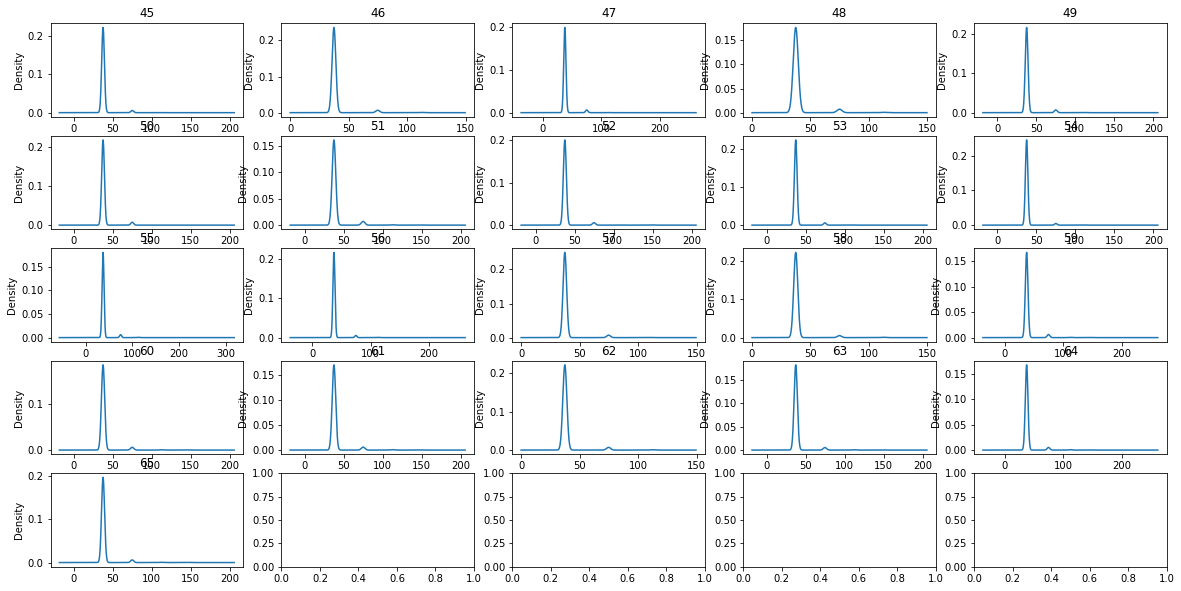

In [38]:
plot_density('f_77')
plot_density('f_78')
plot_density('f_79')

### also with 0 as value

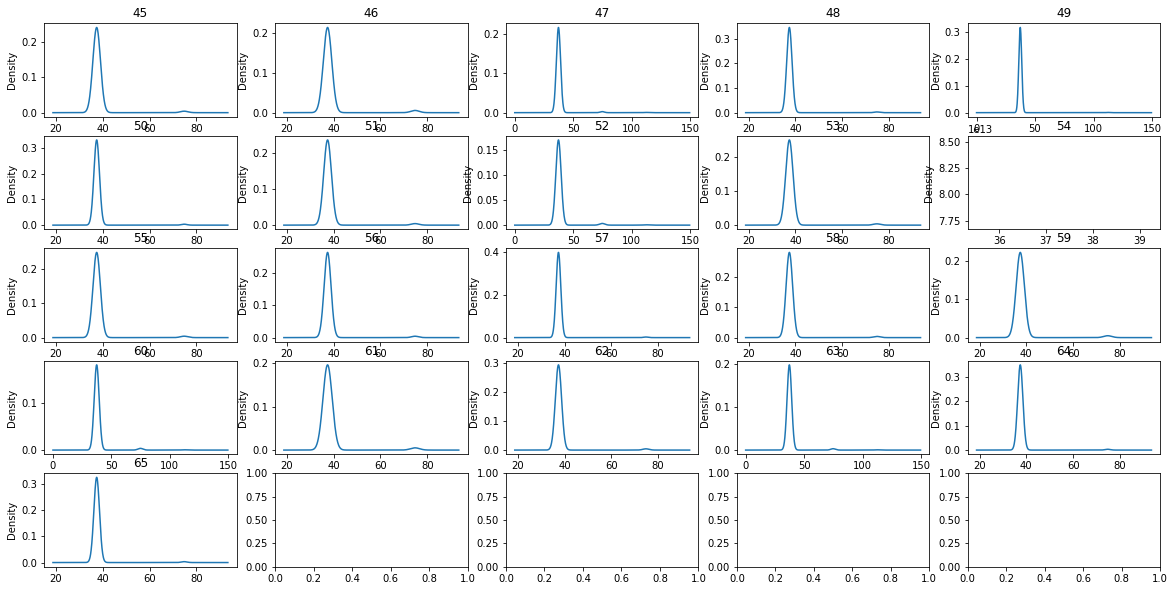

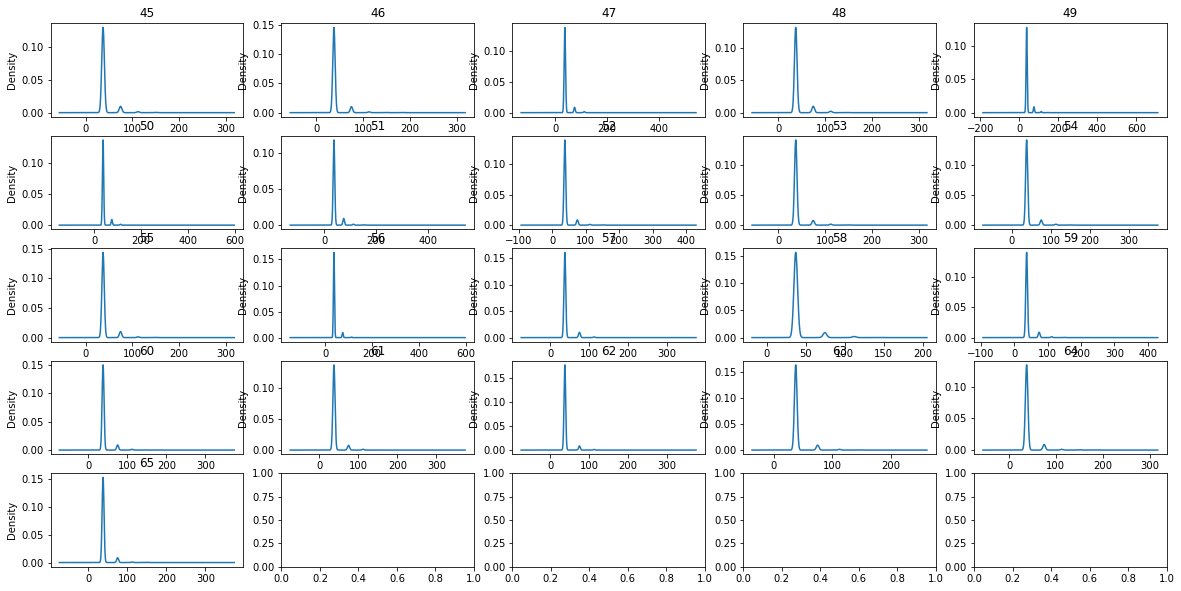

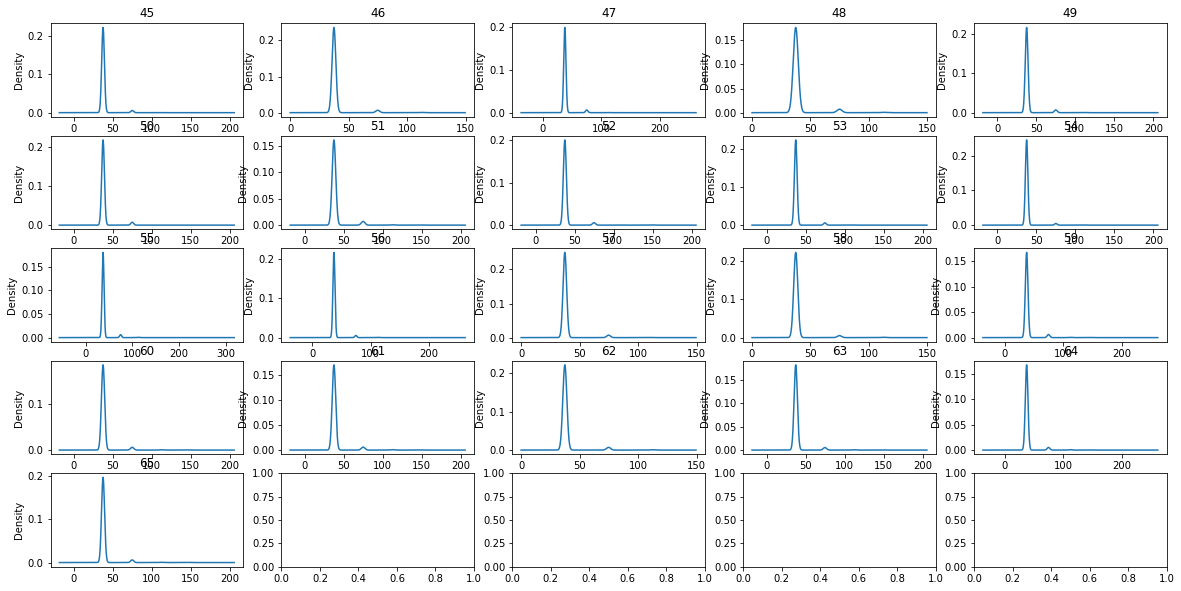

In [46]:
plot_density('f_77')
plot_density('f_78')
plot_density('f_79')

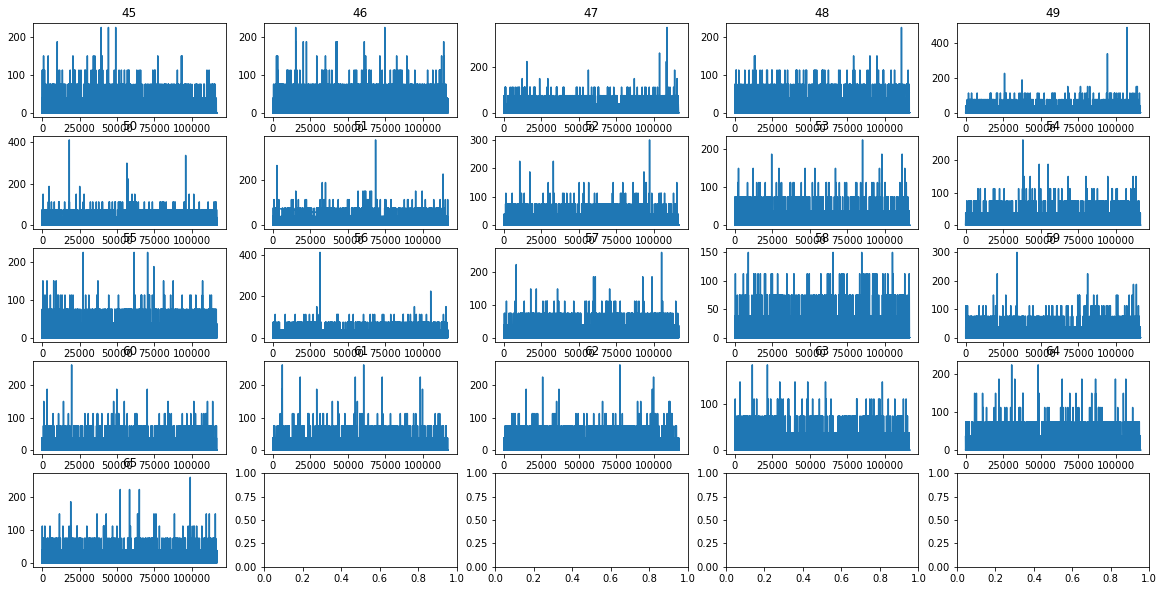

In [47]:
plot_values('f_78')

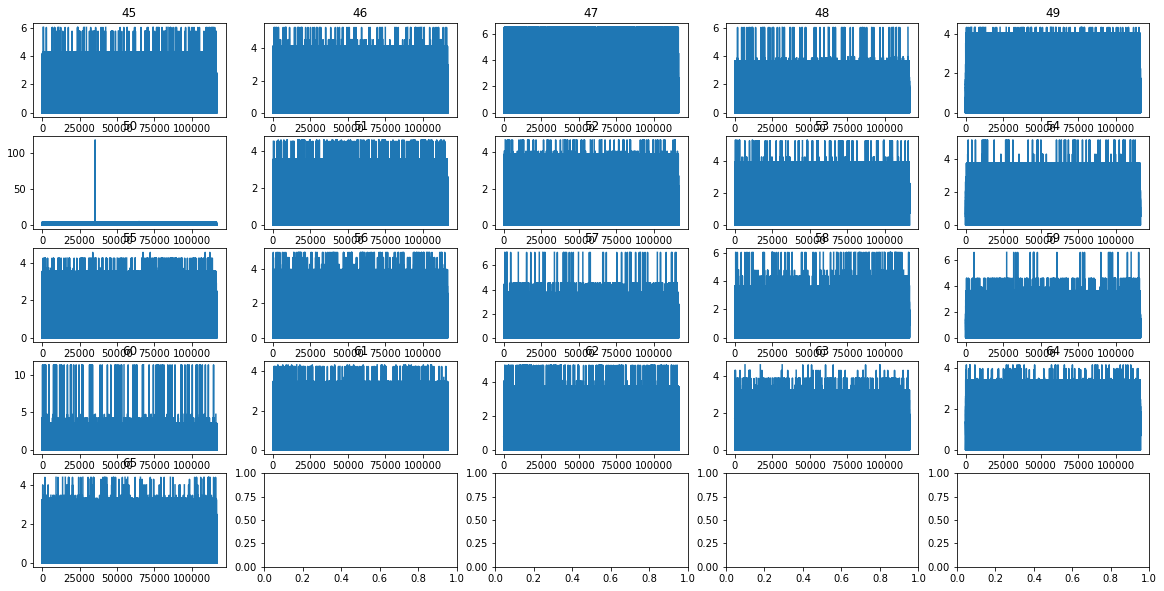

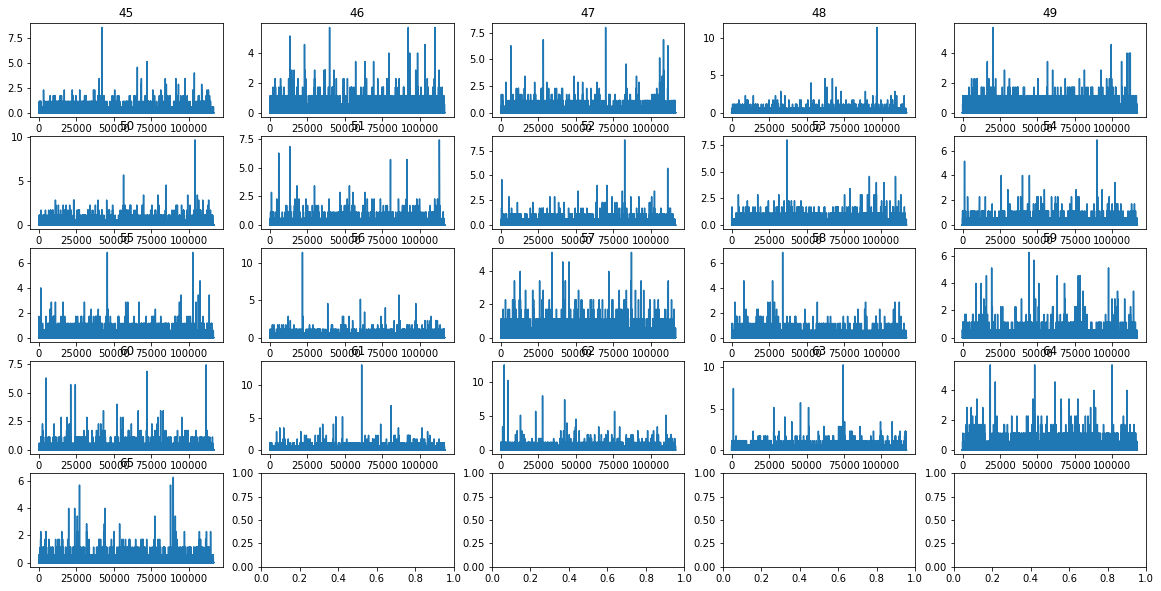

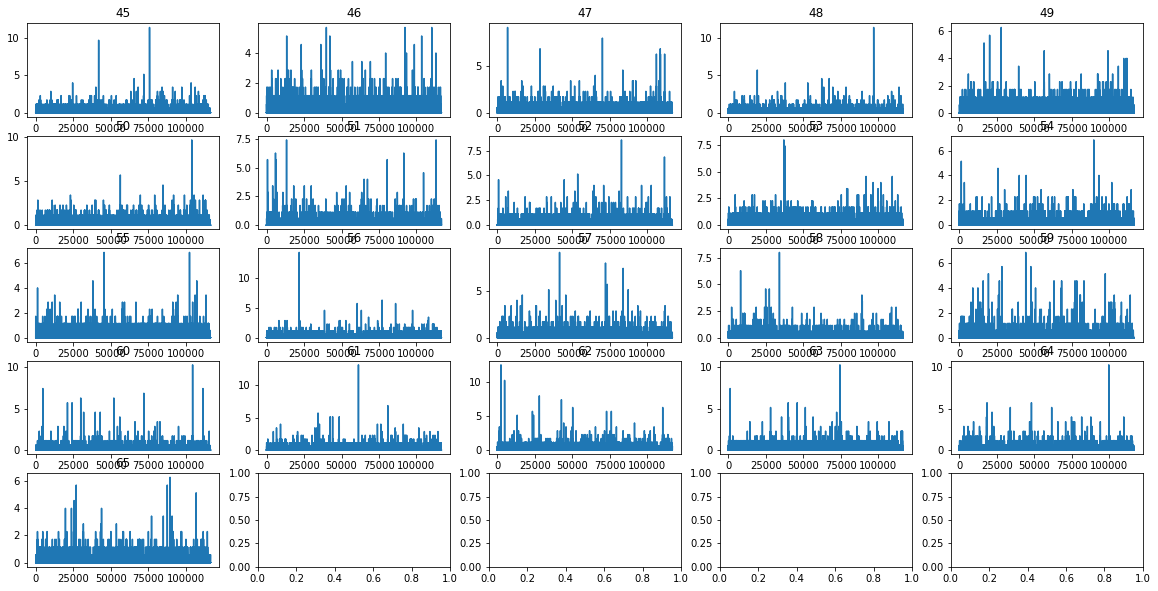

In [35]:
plot_values('f_43')
plot_values('f_44')
plot_values('f_45')

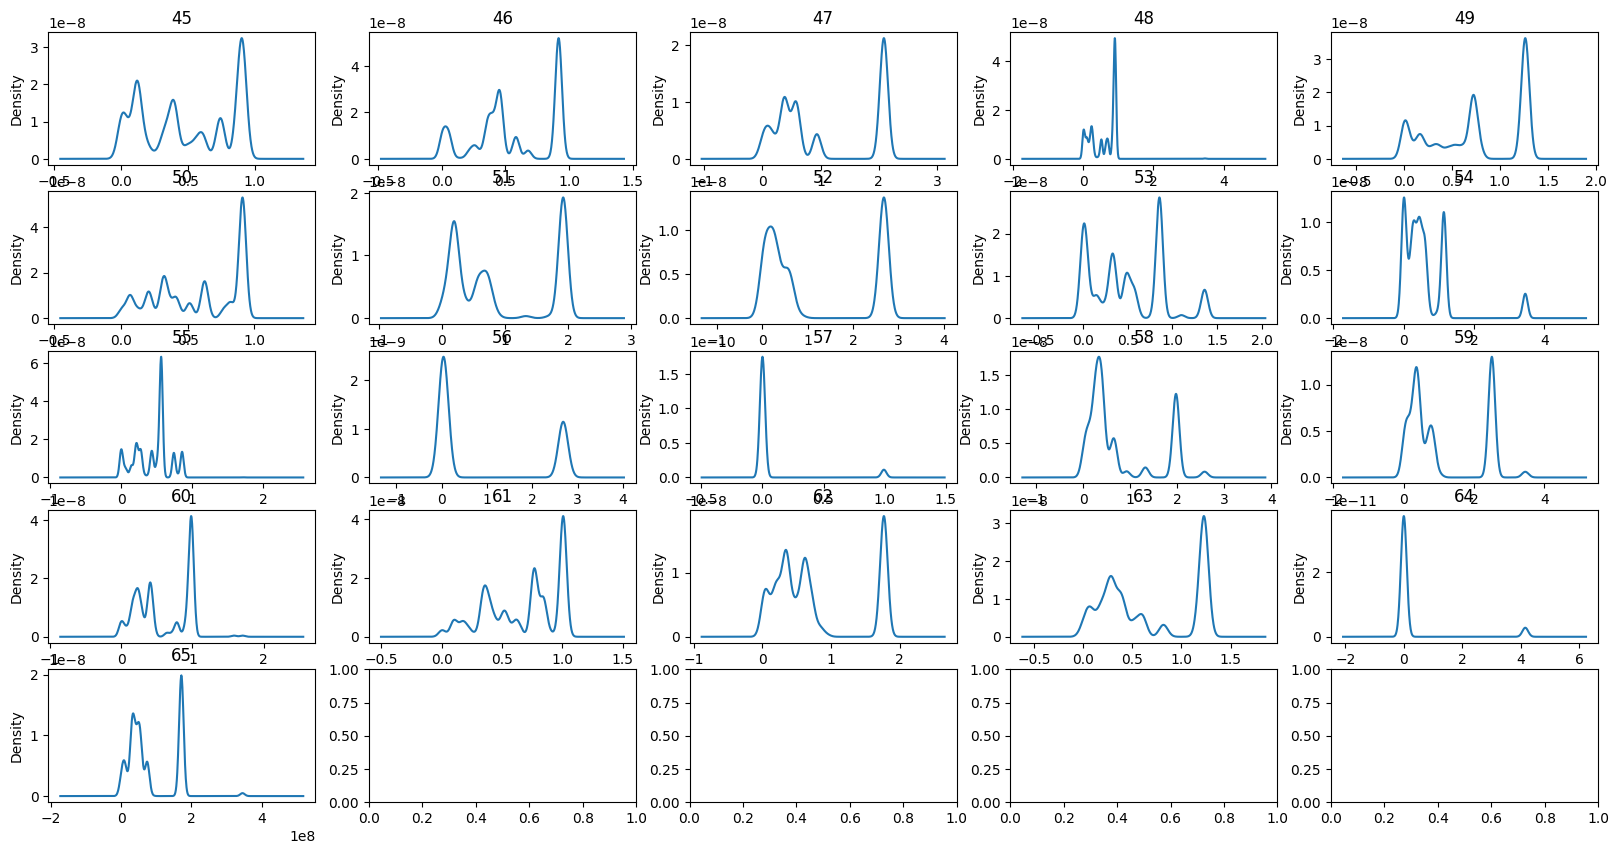

In [13]:
plot_density('f_64')

In [53]:
df_78=df[df['f_78']>38]
df_78[df_78['f_1']==46]

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
3100,121915,46,12577,22294,2059,15908,4018,27941,19203,14659,...,3.426729,0.000000,0.115692,1.156922,0.269948,0.000000,149.538300,0.000000,False,False
4256,2199516,46,23611,22294,17511,25604,16973,27941,21621,14659,...,1.713364,0.000000,0.115692,1.156922,0.269948,0.000000,74.769150,0.000000,False,False
5472,1635425,46,890,7152,497,25604,876,27941,21621,14659,...,5.711215,1.142243,0.115692,1.156922,0.269948,0.000000,74.769150,0.000000,True,True
7830,3025479,46,27583,22294,1998,25604,11680,27941,19606,14659,...,3.997850,1.142243,0.000000,1.156922,0.269948,0.000000,74.769150,37.384575,True,True
12399,1797571,46,17769,22294,14663,25604,9103,27941,19203,14659,...,1.142243,0.571121,0.000000,1.156922,0.269948,0.000000,74.769150,37.384575,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61952,1957619,46,13658,22294,7003,25604,28111,27941,19203,14659,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.000000,74.769150,74.769150,True,True
79819,3130698,46,3346,22294,5579,21545,15317,27941,21218,14659,...,5.711215,3.997850,0.115692,1.156922,0.269948,0.000000,74.769150,37.384575,False,False
103187,1895081,46,32462,22294,13207,21545,29674,27941,19203,14659,...,3.997850,0.000000,0.115692,1.156922,0.269948,0.000000,112.153725,0.000000,True,False
109381,1665161,46,2680,22294,20221,25604,5006,27941,19203,14659,...,5.711215,1.713364,0.115692,1.156922,0.269948,37.384575,74.769150,37.384575,True,False


In [54]:
df_78=df[df['f_78']>38]
df_78[df_78['f_1']==47]

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
894,2825583,47,31824,22294,6036,25604,26392,27941,21621,9638,...,5.711215,2.855607,0.115692,1.156922,0.269948,37.384575,112.153725,112.153725,False,False
19478,714435,47,23199,22294,15036,25604,18995,27941,21621,9638,...,4.568972,0.571121,0.115692,1.156922,0.269948,0.000000,74.769150,0.000000,True,False
31250,2980522,47,27426,22294,32095,21545,16299,27941,21218,9638,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.000000,74.769150,0.000000,False,False
35080,2822605,47,29742,7152,9984,25604,6552,27941,19203,9638,...,3.997850,0.571121,0.115692,1.156922,0.269948,0.000000,112.153725,37.384575,True,False
53287,1196300,47,22706,22294,27250,21545,28258,27941,19203,9638,...,5.711215,2.855607,0.038564,1.156922,0.269948,0.000000,74.769150,0.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78500,568302,47,22706,22294,27250,25604,9572,27941,21218,9638,...,2.284486,0.571121,0.000000,1.156922,0.269948,0.000000,112.153725,0.000000,True,True
95770,139114,47,30131,7152,16170,21545,7710,27941,18800,9638,...,0.571121,0.000000,0.115692,1.156922,0.269948,37.384575,74.769150,37.384575,False,False
105776,389696,47,3346,22294,5579,21545,22708,27941,19203,9638,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.000000,74.769150,74.769150,False,False
108127,1834400,47,931,22294,30000,21545,4094,27941,19203,9638,...,1.713364,1.142243,0.038564,1.156922,0.269948,37.384575,74.769150,37.384575,True,True


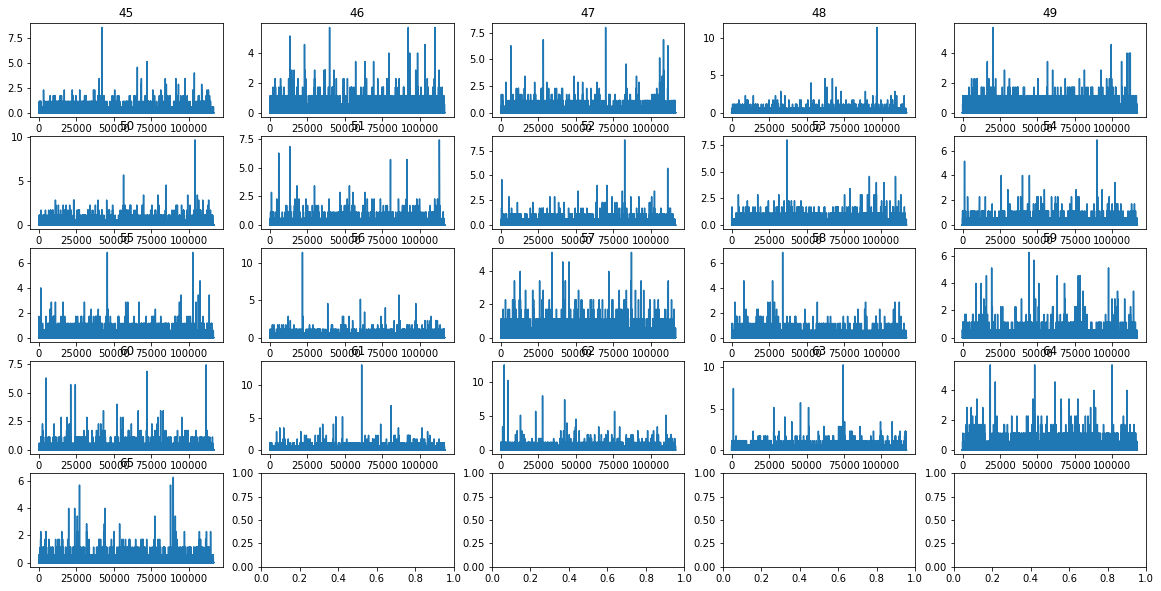

In [13]:
plot_values('f_44')

## Behaviour of categories in different days

In [65]:
DAY=45
FEATURE='f_2'
unique = len(df[FEATURE].unique())
for i in range(22):
    df_mod=df[df['f_1']==DAY]
    day_len=len(df_mod[FEATURE].unique())
    if day_len!=unique:
        print('DAY: %d' %DAY)
        print('NUM TOT CAT: %d' %unique)
        print('NUM FOR THIS DAY: %d' %day_len)
    DAY+=1

DAY: 45
NUM TOT CAT: 136
NUM FOR THIS DAY: 76
DAY: 46
NUM TOT CAT: 136
NUM FOR THIS DAY: 75
DAY: 47
NUM TOT CAT: 136
NUM FOR THIS DAY: 79
DAY: 48
NUM TOT CAT: 136
NUM FOR THIS DAY: 79
DAY: 49
NUM TOT CAT: 136
NUM FOR THIS DAY: 71
DAY: 50
NUM TOT CAT: 136
NUM FOR THIS DAY: 78
DAY: 51
NUM TOT CAT: 136
NUM FOR THIS DAY: 84
DAY: 52
NUM TOT CAT: 136
NUM FOR THIS DAY: 80
DAY: 53
NUM TOT CAT: 136
NUM FOR THIS DAY: 83
DAY: 54
NUM TOT CAT: 136
NUM FOR THIS DAY: 86
DAY: 55
NUM TOT CAT: 136
NUM FOR THIS DAY: 87
DAY: 56
NUM TOT CAT: 136
NUM FOR THIS DAY: 85
DAY: 57
NUM TOT CAT: 136
NUM FOR THIS DAY: 88
DAY: 58
NUM TOT CAT: 136
NUM FOR THIS DAY: 85
DAY: 59
NUM TOT CAT: 136
NUM FOR THIS DAY: 80
DAY: 60
NUM TOT CAT: 136
NUM FOR THIS DAY: 87
DAY: 61
NUM TOT CAT: 136
NUM FOR THIS DAY: 88
DAY: 62
NUM TOT CAT: 136
NUM FOR THIS DAY: 88
DAY: 63
NUM TOT CAT: 136
NUM FOR THIS DAY: 85
DAY: 64
NUM TOT CAT: 136
NUM FOR THIS DAY: 92
DAY: 65
NUM TOT CAT: 136
NUM FOR THIS DAY: 89
DAY: 66
NUM TOT CAT: 136
NUM FOR T

## Check numerical counters

In [21]:
numerical_columns: List[str] = [f"f_{i}" for i in range(42, 80)]

In [54]:
for feature in numerical_columns:
    print('=============='+feature+'=================')
    unique=df[feature].unique()
    unique.sort()
    num=unique[0]
    if unique[0]==0:
        num=unique[1]
    print('Value to divide: %f' %num)
    unique = unique/num
    print(unique)

==============f_42=================
Value to divide: 0.038564
[0.0000000e+00 1.0000000e+00 2.0000000e+00 ... 5.8150200e+05 6.0002900e+05
 6.0890406e+05]
==============f_43=================
Value to divide: 0.000060
[0.0000000e+00 1.0000000e+00 2.2976632e+00 ... 1.8791900e+05 1.9543575e+06
           nan]
==============f_44=================
Value to divide: 0.571121
[ 0.        1.        2.        3.        4.        5.        6.
  7.        8.        9.       10.       11.       12.       13.
 14.       15.       17.000002 18.       20.       22.       23.      ]
==============f_45=================
Value to divide: 0.571121
[ 0.        1.        2.        3.        4.        5.        6.
  7.        8.        9.       10.       11.       12.       13.
 14.       15.       16.       17.000002 18.       20.       22.
 23.       25.000002]
==============f_46=================
Value to divide: 0.571121
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
==============f_47=================
Value t

In [18]:
ind, val = np.unique(df['f_46']/0.57112145, return_counts=True)

<BarContainer object of 11 artists>

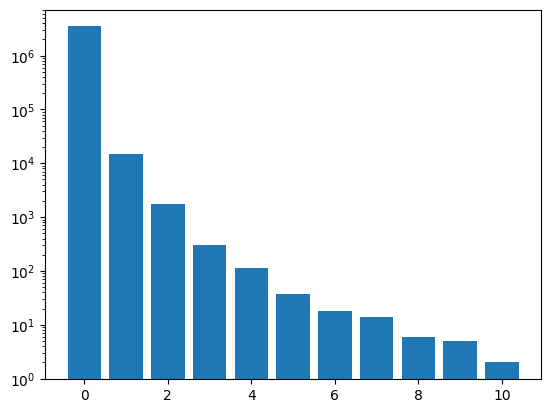

In [19]:
plt.bar(ind, val, log=True)

In [42]:
column = df.columns[column_index]
top_categories = df[column].value_counts()[:top_n]
ax: plt.Axes = axs[i // 2, i % 2]
ax.bar([str(i) for i in top_categories.index], top_categories.values)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
      dtype=float32)

In [51]:
for feature in ['f_74', 'f_75', 'f_76']:
    print(feature)
    unique=df[feature].unique()
    unique = unique/0.03856407
    unique.sort()
    print(unique)

f_74
[0.        0.9999999 1.9999998 2.9999998]
f_75
[ 0.         0.9999999  1.9999998  2.9999998  3.9999995  4.9999995
  5.9999995  6.9999995  7.999999   9.         9.999999  11.
 11.999999  12.999999  13.999999  15.        15.999998  16.999998
 18.        18.999998  19.999998  20.999998  22.        22.999998
 23.999998  24.999998  25.999998  26.999998  27.999998  28.999998
 30.       ]
f_76
[0.        0.9999999 1.9999998 2.9999998 3.9999995 4.9999995 5.9999995
 6.9999995]


In [69]:
for i in range(len(unique)):
    print(unique[i])

1.0
2.0
3.0
4.0
4.9999995
6.0
8.0
9.0
9.999999
11.0
12.999999
13.999999
36.0
39.0
41.0
51.999996
59.999996
76.0
85.0
86.0
142.99998
181.99998
207.99998
999.0
1458.0
1821.9999
3401.0
4765.0
5419.9995
6541.0
8469.0
8696.999
8763.999
9110.999
10396.0
10423.0
10520.0
11343.0
11839.0
12341.999
13131.999
13577.0
14222.999
14518.0
14998.999
15004.0
15445.999
15981.0
16020.0
16402.0
16470.0
17393.0
17600.0
17611.0
17649.998
18197.0
18456.0
18637.998
18648.0
18903.998
19009.0
19109.0
19354.998
19628.998
19787.0
19917.0
20099.998
20612.998
21020.998
21090.0
21541.998
22201.998
22203.0
22223.0
22458.0
22478.0
22501.0
22972.0
23466.0
23726.998
23987.0
24219.0
24334.998
24426.0
24729.998
24760.0
25113.0
25399.0
25451.998
25534.998
26030.998
26654.998
26899.998
27208.0
27266.998
27289.998
27705.998
27781.0
27809.998
27961.0
28009.0
28213.0
28848.0
29292.998
29335.0
29399.998
29550.998
29656.0
29665.0
30005.998
30261.0
30609.998
30803.998
31087.998
31331.998
31711.998
31853.998
32219.0
32421.998
3249

In [75]:
df_mod=df[df['f_1']==66]
day_len=df_mod['f_45'].unique()
day_len=day_len/0.571121
day_len.sort()
day_len

array([ 0.       ,  1.0000008,  2.0000017,  3.0000026,  4.0000033,
        5.0000043,  6.0000052,  7.0000057,  8.000007 , 11.00001  ],
      dtype=float32)

## change dataframe to have more readable counters

In [9]:
group_1=['f_42', 'f_52','f_53','f_54','f_55','f_56','f_57', 'f_74', 'f_75', 'f_76'] #0.038564
group_2=['f_44', 'f_45','f_46','f_47','f_48','f_49','f_50', 'f_71', 'f_72', 'f_73'] #0.57112145
group_3=['f_77', 'f_78', 'f_79'] #37.384575


In [12]:
for feature in numerical_columns:
    if feature in group_1:
        df[feature]=df[feature]/0.038564
    elif feature in group_2:
        df[feature]=df[feature]/0.57112145
    elif feature in group_3:
        df[feature]=df[feature]/37.384575
    elif feature == 'f_60':
        df[feature]=df[feature]/8.079460
    elif feature == 'f_61':
        df[feature]=df[feature]/0.147851
    elif feature == 'f_62':
        df[feature]=df[feature]/0.129300
    elif feature == 'f_63':
        df[feature]=df[feature]/0.355221


In [13]:
df[numerical_columns]

,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,...,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79
0,678.001221,1.400127,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.510695,...,2.828680,2.0,7.0,3.0,3.000005,30.000053,7.000012,0.0,0.0,0.0
1,207.000366,0.001049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.726135,...,0.000000,0.0,0.0,0.0,3.000005,30.000053,7.000012,0.0,0.0,0.0
2,150.000259,0.000187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.668478,...,0.000000,0.0,0.0,0.0,1.000002,30.000053,7.000012,0.0,0.0,0.0
3,751.001282,2.487278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.092316,...,1.598379,0.0,3.0,2.0,3.000005,30.000053,7.000012,0.0,0.0,0.0
4,190.000336,0.000740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.621443,...,0.000000,0.0,0.0,0.0,3.000005,30.000053,7.000012,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485847,1.000002,2.863451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.392765,...,1.860286,0.0,0.0,0.0,0.000000,6.000010,0.000000,0.0,0.0,0.0
3485848,99.000175,1.003624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.392721,...,0.787752,0.0,2.0,0.0,0.000000,30.000053,7.000012,0.0,0.0,0.0
3485849,406.000732,2.218335,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2.509164,...,1.955191,0.0,2.0,0.0,3.000005,30.000053,7.000012,0.0,0.0,0.0
3485850,325.000580,2.244221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.364010,...,2.273288,0.0,4.0,3.0,0.000000,30.000053,7.000012,0.0,0.0,0.0


In [38]:
ind, val = np.unique(df['f_44'], return_counts=True)

In [39]:
ind, val

(array([ 0.      ,  1.      ,  2.      ,  3.      ,  4.      ,  5.      ,
         6.      ,  7.      ,  8.      ,  9.      , 10.      , 11.      ,
        12.      , 13.      , 14.      , 15.      , 17.000002, 18.      ,
        20.      , 22.      , 23.      ], dtype=float32),
 array([3449343,   30859,    4079,     886,     335,     148,      72,
             37,      25,      15,      22,       6,       9,       4,
              3,       2,       1,       2,       2,       1,       1],
       dtype=int64))

In [72]:
counter_columns=numerical_columns.copy()

In [73]:
counter_columns.remove('f_43')
counter_columns.remove('f_51')
counter_columns.remove('f_58')
counter_columns.remove('f_59')
counter_columns.remove('f_64')
counter_columns.remove('f_65')
counter_columns.remove('f_66')
counter_columns.remove('f_67')
counter_columns.remove('f_68')
counter_columns.remove('f_69')
counter_columns.remove('f_70')

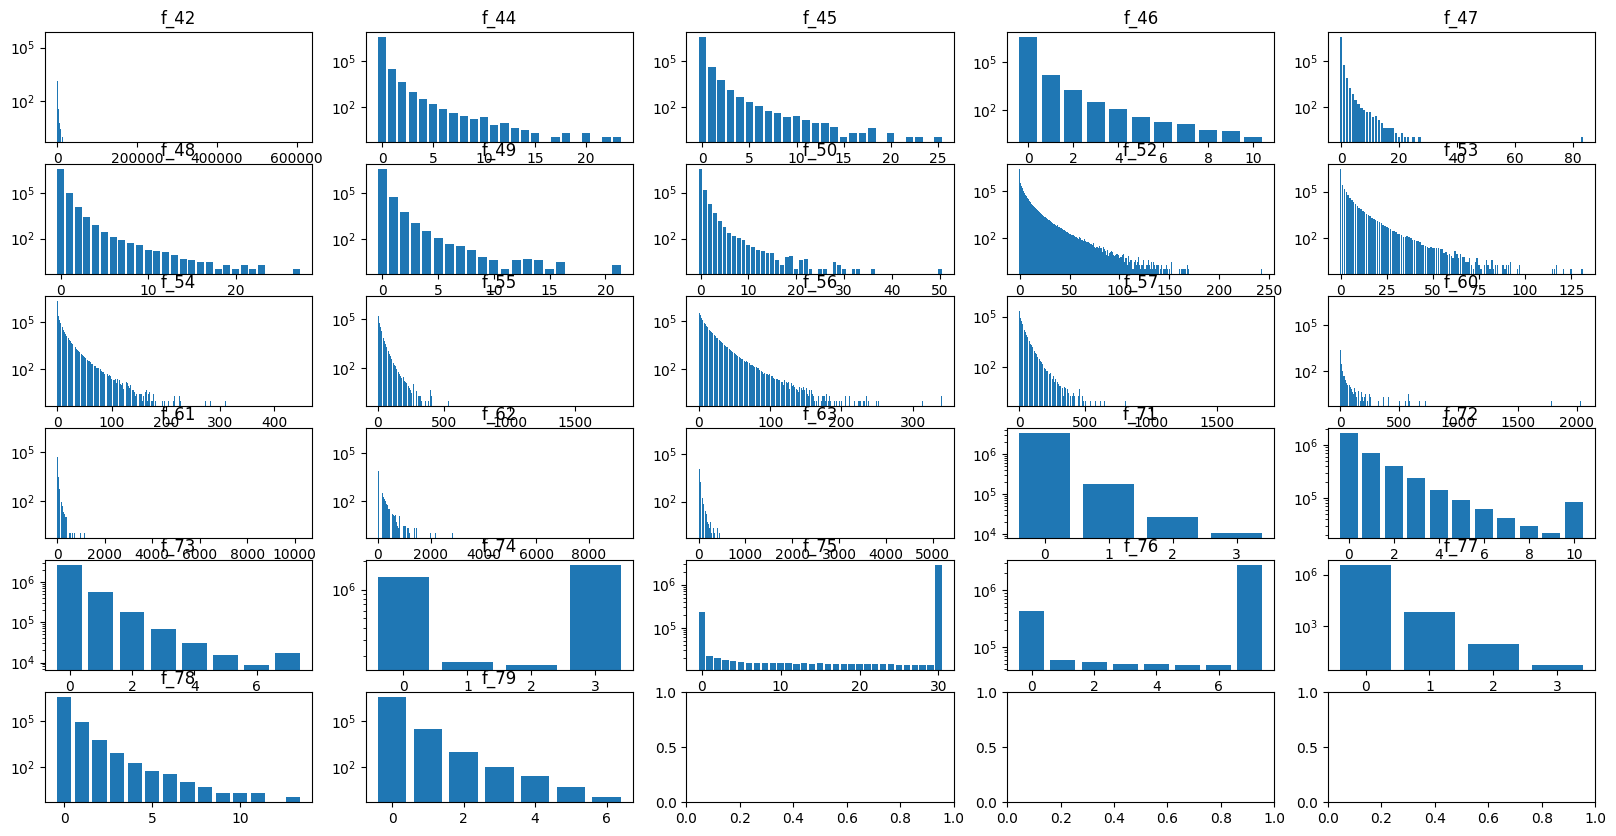

In [78]:
fig, axs = plt.subplots(6,5, figsize=(20,10))
for i in range(len(counter_columns)):
    ind, val = np.unique(df[counter_columns[i]], return_counts=True)
    ax: plt.Axes = axs[i // 5, i % 5]
    ax.bar(ind, val, log=True)
    ax.set_title(counter_columns[i])
    ax.autoscale(enable=True, axis='x')
plt.show()


In [127]:
scaler=preprocessing.MinMaxScaler()
normalized_df=scaler.fit_transform(df[numerical_columns])

In [124]:
ind, val = np.unique(normalized_ex, return_counts=True)

In [125]:
ind, val

(array([0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
        0.5       , 0.6       , 0.7       , 0.8       , 0.90000004,
        1.        ], dtype=float32),
 array([3468845,   14783,    1729,     300,     113,      37,      18,
             14,       6,       5,       2], dtype=int64))

In [134]:
normalized_df[:,0].max()

1.0

## Analysis non counters

In [8]:
non_counter_columns=[]
non_counter_columns.append('f_43')
non_counter_columns.append('f_51')
non_counter_columns.append('f_58')
non_counter_columns.append('f_59')
non_counter_columns.append('f_64')
non_counter_columns.append('f_65')
non_counter_columns.append('f_66')
non_counter_columns.append('f_67')
non_counter_columns.append('f_68')
non_counter_columns.append('f_69')
non_counter_columns.append('f_70')

In [10]:
non_counter_columns

['f_43',
 'f_51',
 'f_58',
 'f_59',
 'f_64',
 'f_65',
 'f_66',
 'f_67',
 'f_68',
 'f_69',
 'f_70']

In [11]:
non_counters=df[non_counter_columns]

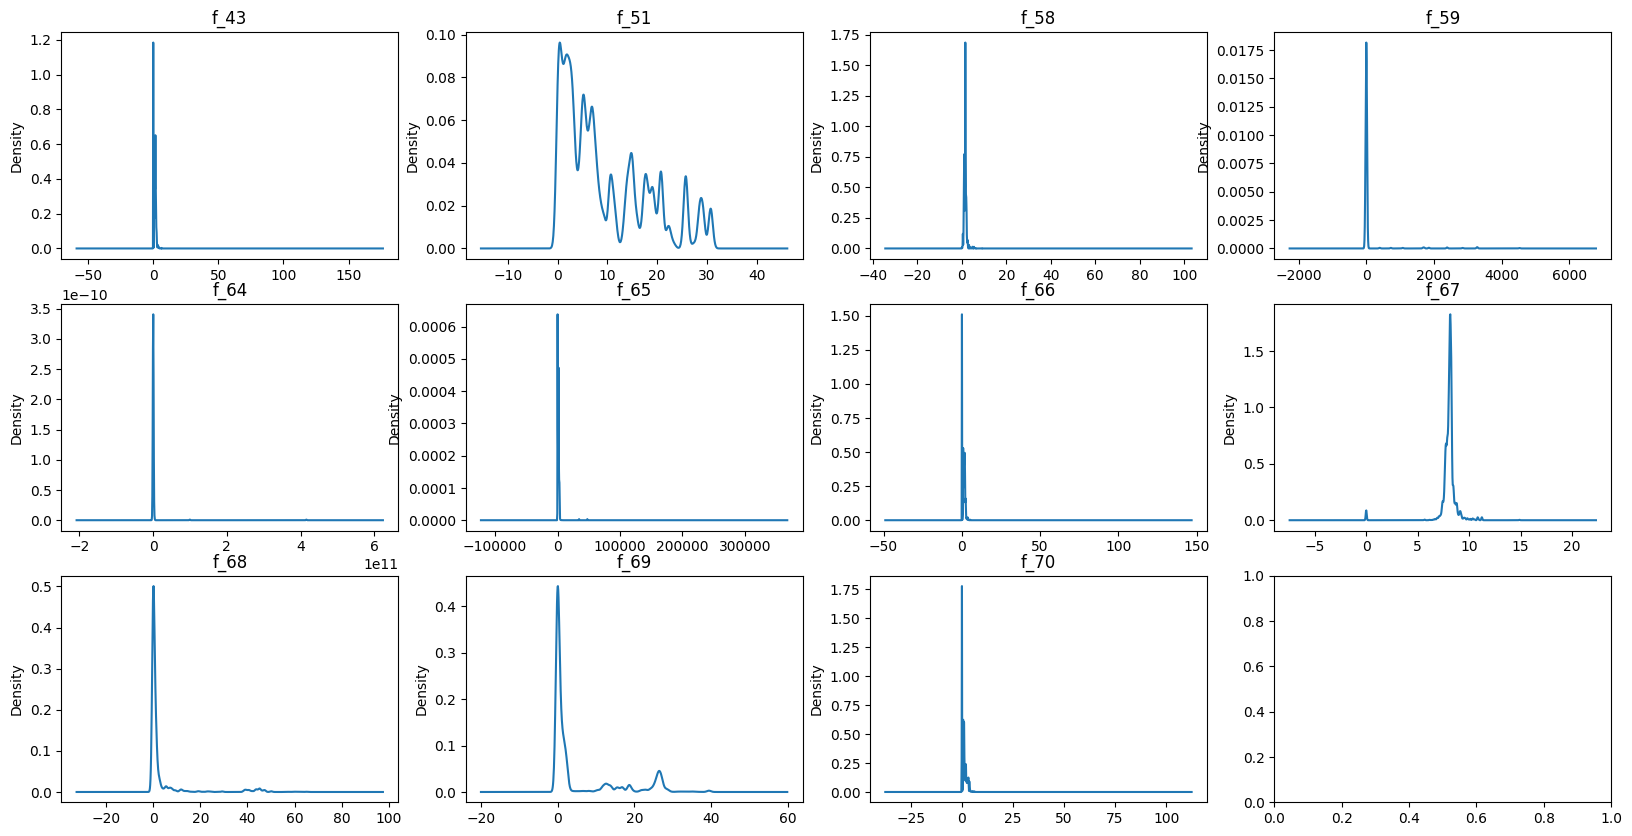

In [15]:
fig, axs = plt.subplots(3,4, figsize=(20,10))
for i in range(len(non_counter_columns)):
    #ind, val = np.unique(df[non_counter_columns[i]], return_counts=True)
    ax: plt.Axes = axs[i // 4, i % 4]
    df[non_counter_columns[i]].plot(title=non_counter_columns[i], ax=ax, kind='kde')
plt.show()

In [16]:
df.loc[(df['f_64']!=0), ['f_64','f_65','f_66','f_67','f_68','f_69','f_70', 'is_clicked', 'is_installed']]

,f_64,f_65,f_66,f_67,f_68,f_69,f_70,is_clicked,is_installed
0,69350016.0,1462.240112,1.599715,7.851264,0.000000,0.000000,2.828680,False,False
1,126347712.0,1639.124390,0.000873,8.157428,1.089364,1.646756,0.000000,False,False
2,192447264.0,1808.083740,0.000156,8.269833,1.106260,2.220819,0.000000,False,False
3,17889246.0,110.105034,2.276684,9.171566,0.000000,0.000000,1.598379,False,False
4,177032128.0,1478.281372,0.000615,8.126352,0.200315,0.444261,0.000000,False,False
...,...,...,...,...,...,...,...,...,...
3485847,24862368.0,611.893372,2.617266,10.119306,0.000000,0.000000,1.860286,False,False
3485848,87224952.0,1571.595947,1.006366,7.692349,1.705995,28.178593,0.787752,False,False
3485849,45037620.0,527.686890,2.120234,8.231934,9.090161,15.003540,1.955191,False,False
3485850,1734921.0,23.838779,2.151893,9.062996,23.038227,22.649107,2.273288,False,False


(-2.0, 100000000000.0)

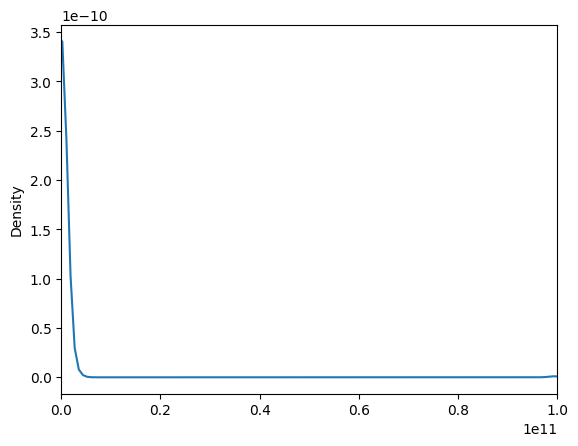

In [40]:
ax = df['f_64'].plot(kind='kde')
ax.set_xlim(-2,1e11)

In [37]:
df['f_64'].describe()

count    3.304425e+06
mean     1.606620e+09
std      2.285624e+10
min      0.000000e+00
25%      2.828068e+07
50%      5.643671e+07
75%      9.176122e+07
max      4.157068e+11
Name: f_64, dtype: float64

In [46]:
np.sum(df['f_64']<1e9)

3227657

In [52]:
for feature in numerical_columns:
    print('====='+feature+'=====')
    print('perc of 0: %f' %(np.sum(df[feature]==0)/df.shape[0]))
    print('max: %f' %df[feature].max())
    print('mean: %f' %df[feature].mean())

=====f_42=====
perc of 0: 0.107206
max: 608905.125000
mean: 489.290833
=====f_43=====
perc of 0: 0.001270
max: 117.602448
mean: 1.089989
=====f_44=====
perc of 0: 0.989527
max: 23.000000
mean: 0.013035
=====f_45=====
perc of 0: 0.986801
max: 25.000002
mean: 0.016624
=====f_46=====
perc of 0: 0.995121
max: 10.000000
mean: 0.005765
=====f_47=====
perc of 0: 0.982741
max: 83.000008
mean: 0.022257
=====f_48=====
perc of 0: 0.968384
max: 27.000000
mean: 0.037930
=====f_49=====
perc of 0: 0.981887
max: 21.000002
mean: 0.020940
=====f_50=====
perc of 0: 0.952304
max: 50.000004
mean: 0.059124
=====f_51=====
perc of 0: 0.000000
max: 30.726135
mean: 9.612607
=====f_52=====
perc of 0: 0.663381
max: 243.000443
mean: 1.675814
=====f_53=====
perc of 0: 0.787633
max: 131.000229
mean: 0.758440
=====f_54=====
perc of 0: 0.553190
max: 447.000793
mean: 2.891022
=====f_55=====
perc of 0: 0.336587
max: 1846.003296
mean: 9.008270
=====f_56=====
perc of 0: 0.481636
max: 340.000580
mean: 4.129601
=====f_57===

### Analysis of binaries

In [56]:
for feature in binary_columns:
    print('====='+feature+'=====')
    print('perc of False: %f' %(np.sum(df[feature]==False)/df.shape[0]))

=====f_33=====
perc of False: 0.938725
=====f_34=====
perc of False: 0.475482
=====f_35=====
perc of False: 0.745926
=====f_36=====
perc of False: 0.389136
=====f_37=====
perc of False: 0.068046
=====f_38=====
perc of False: 0.122233
=====f_39=====
perc of False: 0.998190
=====f_40=====
perc of False: 0.973751
=====f_41=====
perc of False: 0.990824


In [63]:
df.loc[(df['f_33']==False)&(df['f_35']==False)&(df['f_37']==True)&(df['f_38']==True)&(df['f_39']==False)&(df['f_40']==False)&(df['f_41']==False), ['is_clicked', 'is_installed']]

,is_clicked,is_installed
1,False,False
2,False,False
4,False,False
5,True,False
7,True,True
...,...,...
3485844,False,True
3485845,True,True
3485846,False,False
3485848,False,False


In [66]:
df.loc[np.bitwise_not((df['f_33']==False)&(df['f_35']==False)&(df['f_37']==True)&(df['f_38']==True)&(df['f_39']==False)&(df['f_40']==False)&(df['f_41']==False)), ['is_clicked', 'is_installed']]

,is_clicked,is_installed
0,False,False
3,False,False
6,False,False
10,True,False
11,True,False
...,...,...
3485840,True,True
3485841,True,False
3485847,False,False
3485850,False,False


* 3113 rows where they're always true

In [59]:
always_false=df.loc[(df['f_33']==False)&(df['f_34']==False)&(df['f_35']==False)&(df['f_36']==False)&(df['f_37']==False)&(df['f_38']==False)&(df['f_39']==False)&(df['f_40']==False)&(df['f_41']==False), ['is_clicked', 'is_installed']]

* 236229 rows are always false

In [60]:
always_false['is_installed'].value_counts()

is_installed
False    207642
True      28587
Name: count, dtype: Int64

In [82]:
all_true=df.loc[(df['f_39']==True)&(df['f_40']==True)&(df['f_41']==True), ['is_clicked', 'is_installed']]

In [87]:
f_39['is_installed'].value_counts()

is_installed
False    4513
True     1795
Name: count, dtype: Int64

* check if there is a combination of values for which is_installed is always true

In [47]:
import itertools

# get all possible combinations of values for the features
combinations = list(itertools.product([0, 1], repeat=6))
combinations = [[bool(x) for x in combination] for combination in combinations]
# test each combination and find the one that always results in a label of 1
for combination in combinations:
    print('Trying for combination:', combination)
    if all(df.loc[i, binary_columns[:6]].equals(pd.Series(combination)) for i in df[df['is_installed'] == 0].index):
        print('Found combination:', combination)
        break
else:
    print('No combination found')

Trying for combination: [False, False, False, False, False, False]
Trying for combination: [False, False, False, False, False, True]
Trying for combination: [False, False, False, False, True, False]
Trying for combination: [False, False, False, False, True, True]
Trying for combination: [False, False, False, True, False, False]
Trying for combination: [False, False, False, True, False, True]
Trying for combination: [False, False, False, True, True, False]
Trying for combination: [False, False, False, True, True, True]
Trying for combination: [False, False, True, False, False, False]
Trying for combination: [False, False, True, False, False, True]
Trying for combination: [False, False, True, False, True, False]
Trying for combination: [False, False, True, False, True, True]
Trying for combination: [False, False, True, True, False, False]
Trying for combination: [False, False, True, True, False, True]
Trying for combination: [False, False, True, True, True, False]
Trying for combination:

## GroupBy


In [27]:
columns_to_group=[]
for f in categorical_columns:
    if ((df[f].unique()).shape[0]) < 150:
        columns_to_group.append(f)

In [28]:
to_delete = ['f_0','f_7','f_27','f_28','f_29']
columns_to_group=[x for x in columns_to_group if x not in to_delete]

In [48]:
columns_to_group

['f_2',
 'f_3',
 'f_5',
 'f_8',
 'f_9',
 'f_10',
 'f_11',
 'f_12',
 'f_14',
 'f_16',
 'f_17',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_30',
 'f_31',
 'f_32']

In [80]:
counts = df.groupby(columns_to_group[-7:])['f_23'].count()
counts = counts[counts > 0]
print(counts)

f_23  f_24  f_25  f_26  f_30  f_31  f_32
0     0     0     0     0     0     0       166865
                                    1       161612
                                    2       498711
                                    3       869692
                              1     0           11
                                    1           11
                                    2           23
                                    3           62
                        1     0     0          118
                                    1          106
                                    2          362
                                    3          720
                              1     0           72
                                    1           49
                                    2          221
                                    3          425
                        2     2     0       163126
                                    1       140133
                                    2    

In [70]:
#iterate over valid indexes
for i in counts.index:
    if counts[i]/df.shape[0]>0.1:
        print(i)
        print(counts[i])
        print(counts[i]/df.shape[0])

(0, 0, 0, 0, 0, 0, 2)
498711
0.14306717554273676
(0, 0, 0, 0, 0, 0, 3)
869692
0.24949194630179364
(0, 0, 0, 0, 2, 2, 2)
429865
0.12331705419507197
(0, 0, 0, 0, 2, 2, 3)
828110
0.23756315529173355


In [72]:
comb=df.loc[(df['f_23']==0)&(df['f_24']==0)&(df['f_25']==0)&(df['f_26']==0)&(df['f_30']==0)&(df['f_31']==0)&(df['f_32']==3), ['is_clicked', 'is_installed']]

In [79]:
comb['is_installed'].value_counts()[1]/comb.shape[0]

0.20921774605262553

In [52]:
result_df=pd.DataFrame(counts)

In [53]:
show_all(result_df)

In [35]:
DAY = 45
for i in range(0,22):
    print(DAY)
    print(np.unique(df[df['f_1']==DAY]['f_11'], return_counts=True))
    DAY+=1

45
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64), array([ 4194,  7576,  9239,  9735,  5086,  4577,  9812,  8680, 14742,
        3773,   870,  1402,  8141,  1012,  9774,   579,  7568,   263,
        9037,  1076,  5974,  3919,  7197,  5980], dtype=int64))
46
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64), array([22155, 32541, 21248, 18952, 12371,  5188, 15782,  7374,  6036,
        5344,  2731,  5085,  9994,  4227,  5692,  1839,  5734,   343,
        9595,  4246, 10374, 10617,  8238,  8371], dtype=int64))
47
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64), array([ 3664,  5381, 15122, 13558, 10176, 17885, 11896, 18979, 20443,
        8428,  2549,  4621, 12144,   234, 13248,   175, 14023,   772,
       10687,  1097,  6560, 12324,  9809,  6360], dtype=int64))
4

In [28]:
df['f_65'].describe()

count    3.304425e+06
mean     1.456593e+03
std      3.333623e+03
min      0.000000e+00
25%      2.672391e+02
50%      1.185379e+03
75%      1.865941e+03
max      2.453757e+05
Name: f_65, dtype: float64